 # Crash Course in Statistical Learning Written Section 

## Flight Price Prediction

Name - Viral Jangale   
NUID - 002654463     
Topic- Flight Price Prediction.
In this assignment I have worked using Univariate, Bivariate analysis along with their different sub-categories. I have also performed various regression algorithms such as linear regression, decision tree, random forest, XGboost, Adaboost and have compared those model.



### Abstract: 

The objective of the study is to analyse the flight booking dataset to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.The goal is to use statistical hypothesis tests and linear regression to analyze a flight booking dataset and gain insights into flight prices and related variables. The data will be studied in depth to uncover patterns and correlations that can provide valuable information to passengers, such as the most popular travel routes and the busiest days of the week for travel. The ultimate goal is to use these insights to help passengers make informed decisions when booking flights, which can save them time and money.


#### Dataset Information: 

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the dataset.

### `FEATURES`
The various features of the cleaned dataset are explained below: 

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 differentairlines. 

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels. 

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities. 

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time. 

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities. 

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy. 

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours. 

10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date. 

11) Price: Target variable stores information of the ticket price.

## `Importing libraries`

In most programming languages, including Python, libraries are collections of pre-existing code that provide additional functionality to your program. Libraries can include code for a variety of purposes, such as data manipulation, data visualization, machine learning, and more.

In [1]:
# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore warnigns
import warnings
warnings.filterwarnings('ignore')


## Import dataset

To import a dataset in Python, you can use various libraries depending on the file format of your dataset. Here dataset is imported from github.

In [2]:
data = pd.read_csv("https://github.com/Viral-28/Datascience/raw/main/Clean_Dataset.csv")
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## Overview of the Data

data.info() is a method used to display a concise summary of a pandas DataFrame. It provides information about the DataFrame, such as the column names, the number of non-null values in each column, and the data type of each column.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


# `Removing unnamed column`
If we have an unnamed column in a pandas DataFrame and we want to remove it, we can do so using the drop() method. The unnamed column is usually created when reading in a CSV file that has an extra comma at the end of each row.

data.drop() is a method used to remove one or more rows or columns from a pandas DataFrame. It returns a new DataFrame with the specified rows or columns removed.

In [4]:
data.drop(["Unnamed: 0"] , axis=1,inplace=True)
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


data.describe() is a method used to generate descriptive statistics of a pandas DataFrame. It provides information about the central tendency, dispersion, and shape of the distribution of a dataset, such as the mean, standard deviation, minimum, and maximum values of each column.

In [5]:
data.describe(percentiles=[0.05,0.1,0.25,0.75,0.9,0.95]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
duration,300153.0,12.221021,7.191997,0.83,2.17,2.75,6.83,11.25,16.17,23.67,25.92,49.83
days_left,300153.0,26.004751,13.561004,1.00,4.00,7.00,15.00,26.00,38.00,45.00,47.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,2436.00,3389.00,4783.00,7425.00,42521.00,57920.00,63277.00,123071.00


Based on our observation, there appear to be some outliers in the price variable, and since all the destination and source cities are located in India, a duration of 49.83 may also be considered an outlier. To gain a better understanding of this issue, let's investigate further with additional information.

In [6]:
data.describe(percentiles=[0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,90%,95%,96%,97%,98%,99%,max
duration,300153.0,12.221021,7.191997,0.83,11.25,23.67,25.92,26.33,26.75,27.5,29.08,49.83
days_left,300153.0,26.004751,13.561004,1.00,26.00,45.00,47.00,48.00,48.00,49.0,49.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,7425.00,57920.00,63277.00,65529.00,67769.00,70431.0,76736.00,123071.00


data.describe(percentiles=[0.9,0.95,0.96,0.97,0.98,0.99]).T is a method used to generate descriptive statistics of a pandas DataFrame with additional percentile values. The percentiles parameter specifies which percentiles to include in the output, and the .T attribute is used to transpose the resulting DataFrame for easier readability.



It has been determined that the maximum value of the price variable is an outlier, and similarly, a duration of 49.83 is also an outlier. In order to address this issue, we will replace the 49.83 duration outlier with the median value.

### Check for null values
To check for null values in a pandas DataFrame, you can use the isnull() method, which returns a DataFrame of the same shape as the original but with boolean values indicating where each value is missing (True) or not (False).You can then use the sum() method on the resulting DataFrame to count the number of null values in each column.

In [7]:
data.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

### Checking for Duplicated values
To check for duplicated values in a pandas DataFrame, you can use the duplicated() method, which returns a boolean Series indicating which rows are duplicates of previous rows. By default, it considers all columns when identifying duplicates, but you can also specify a subset of columns to consider using the subset parameter.

In [8]:
data.shape

(300153, 11)

data.shape is a method used to return the dimensions of a pandas DataFrame. It returns a tuple containing the number of rows and columns in the DataFrame. For example, data.shape would return (1000, 10) if the DataFrame has 1000 rows and 10 columns.

In [9]:
data.duplicated().sum()

0

data.duplicated().sum() is a method used to count the number of duplicate rows in a pandas DataFrame. It returns the total number of rows that are identical to another row in the DataFrame.

# `Exploratory Data Analysis`
EDA stands for Exploratory Data Analysis. It is the process of examining and analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. The goal of EDA is to gain an understanding of the data, identify patterns and relationships, and detect anomalies and outliers.

EDA typically involves a variety of techniques, including data cleaning and preparation, descriptive statistics, visualizations such as scatterplots and histograms, and statistical inference. The ultimate aim of EDA is to generate hypotheses about the underlying data generating process and to guide the selection of appropriate modeling techniques.

## Univariate Analysis
Univariate analysis is a statistical technique that involves analyzing a single variable at a time. The primary aim of this method is to understand the characteristics of the variable, such as its distribution, central tendency, and variability. Common techniques used in univariate analysis include histograms, box plots, measures of central tendency and variability, and frequency tables. By using these techniques, researchers can gain insights into the nature of the variable and better understand its role in a larger data set.

###  Airline 
Univariate analysis on the airline feature involves analyzing and summarizing the characteristics of this single variable. This could include examining the frequency distribution of the different airlines present in the dataset, calculating measures of central tendency such as the mean or median to determine the most common airline, and exploring the variability of the data to identify any potential outliers or extreme values

In [10]:
data['airline'].value_counts(normalize=True) 

Vistara      0.425979
Air_India    0.269503
Indigo       0.143660
GO_FIRST     0.077204
AirAsia      0.053633
SpiceJet     0.030021
Name: airline, dtype: float64

data['airline'].value_counts(normalize=True) is a method used to count the frequency of unique values in a specific column of a pandas DataFrame and normalize the results to express them as a proportion of the total count. The resulting output is a pandas Series object.

In [11]:
data.airline.describe()

count      300153
unique          6
top       Vistara
freq       127859
Name: airline, dtype: object

data.airline.describe() is a method used to compute various descriptive statistics for a specific column (in this case, 'airline') of a pandas DataFrame. The resulting output is a pandas Series object.

[Text(0.5, 0, 'airline'), Text(0, 0.5, 'Frequency of airline')]

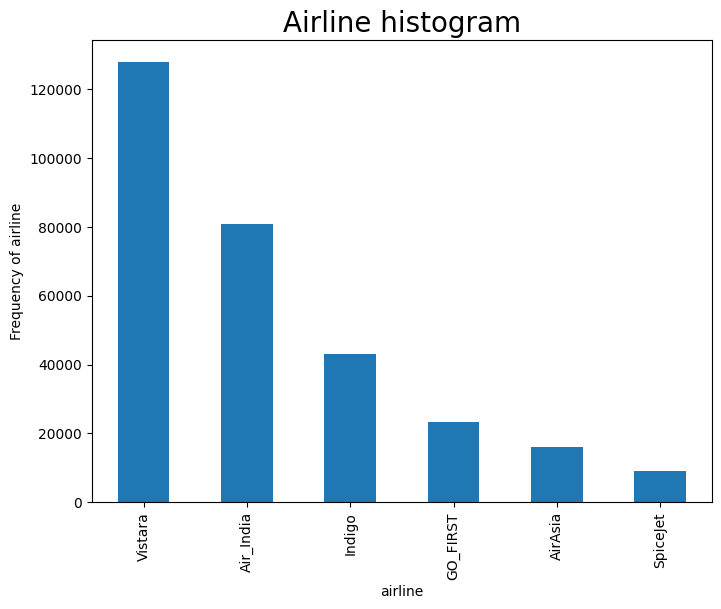

In [12]:
plt.figure(figsize=(8, 6))
plt1 = data.airline.value_counts().plot(kind='bar')
plt.title('Airline histogram', fontsize=20)
plt1.set(xlabel = 'airline', ylabel='Frequency of airline')

plt.figure(figsize=(8, 6)) creates a new figure with a specified size of 8 inches by 6 inches.

plt1 = data.airline.value_counts().plot(kind='bar') creates a horizontal bar chart of the counts of each unique value in the 'airline' column of the DataFrame 'data', and assigns the resulting AxesSubplot object to the variable plt1.

plt.title('Airline histogram', fontsize=20) sets the title of the plot to 'Airline histogram' with a font size of 20.

plt1.set(xlabel = 'airline', ylabel='Frequency of airline') sets the labels of the x-axis and y-axis of the plot to 'airline' and 'Frequency of airline', respectively.

Overall, this code creates a bar chart that displays the frequency of each airline in the 'airline' column of the DataFrame 'data', with appropriate axis labels and a title.


plt.figure(figsize=(10,8)) creates a new figure with a specified size of 10 inches by 8 inches.

s = data["airline"].value_counts(ascending=False).plot(kind ="pie", autopct='%1.0f%%', shadow=True) creates a pie chart of the counts of each unique value in the 'airline' column of the DataFrame 'data', with labels indicating the percentage of each airline and a shadow effect. The value_counts() function is used to count the frequency of each unique value in the 'airline' column of the DataFrame 'data'. The ascending=False parameter is used to sort the counts in descending order. The resulting AxesSubplot object is assigned to the variable s.

s displays the resulting pie chart.

Overall, this code creates a pie chart that displays the percentage of each airline in the 'airline' column of the DataFrame 'data', with appropriate formatting options and a shadow effect.

<Axes: ylabel='airline'>

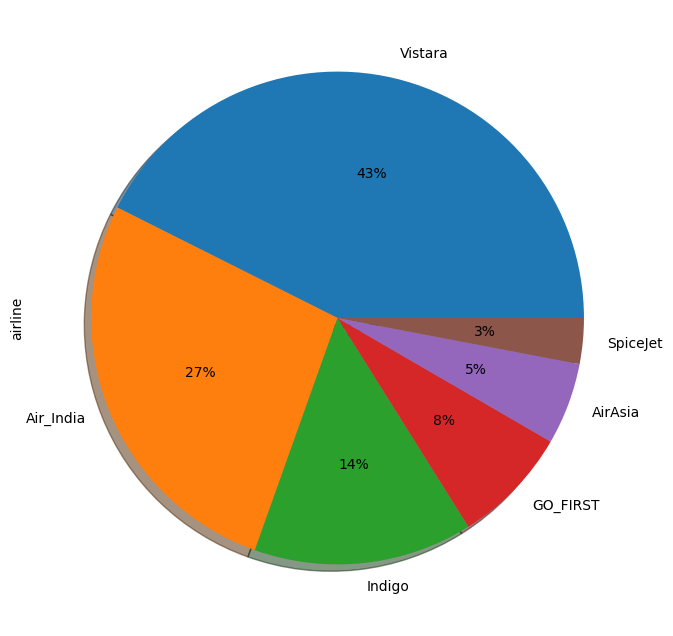

In [13]:
plt.figure(figsize=(10,8))
s = data["airline"].value_counts(ascending=False).plot(kind ="pie", autopct='%1.0f%%', shadow=True)
s

The analysis presented above provides insights that suggest the existence of six distinct airline companies in the market. Moreover, the analysis highlights the fact that Vistara emerges as the most frequently preferred airline by travelers, while Spicejet appears to be the least favored airline, with a comparatively lower preference frequency. Above Analysis shows,

There are 6 companies of airline which are distinct.
With highest frequency, Vistara is the most preferred Airline by travellers and Spicejet is the least preferred Airline.

### Flight

Univariate analysis of the 'flight' feature typically involves examining its distribution, central tendency, dispersion, and outliers.
One way to visualize the distribution of the 'flight' feature is by creating a histogram, which shows the frequency distribution of the values in the column. A histogram can provide insights into the shape of the distribution, such as whether it is skewed, bimodal, or normal.

In [14]:
data['flight'].value_counts()

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

data['flight'].value_counts() is a method used to count the frequency of unique values in the 'flight' column of a pandas DataFrame. The resulting output is a pandas Series object, where each row represents a unique value in the 'flight' column and the corresponding count of its occurrence in the DataFrame.

This method is useful for quickly identifying the most frequently occurring flights in the dataset or for detecting any potential outliers or irregularities in the data.

In [15]:
# drop flight column
data.drop(['flight'] , axis=1, inplace=True)
data.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


data.drop(['flight'], axis=1, inplace=True) is a method used to drop the 'flight' column from a pandas DataFrame called 'data'. The 'axis=1' parameter specifies that the column should be dropped, while the 'inplace=True' parameter specifies that the change should be made to the original 'data' DataFrame, rather than returning a modified copy.

data.head() is then used to display the first few rows of the modified DataFrame, which no longer includes the 'flight' column. This allows you to confirm that the column has been successfully dropped from the DataFrame.

### Source city, Destination city

Univariate analysis on 'Source city' and 'Destination city' typically involves examining their frequency distributions and descriptive statistics.

We can use the value_counts() method to obtain the frequency of unique values in each column. This can help identify the most common values, which can provide insight into the origins and destinations of the flights.

In [16]:
print('Source City:', data['source_city'].unique()
      ,"\n",
      'Destination city:',data['destination_city'].unique())

Source City: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai'] 
 Destination city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']


print('Source City:', data['source_city'].unique(), 'Destination city:', data['destination_city'].unique()) is a command that prints the unique values in the 'source_city' and 'destination_city' columns of the DataFrame called 'data'.

The unique() method returns an array of unique values in the specified column. The output will be printed as two separate arrays, one for the unique values in 'source_city' and one for the unique values in 'destination_city', separated by a comma and a space. This command is useful for quickly getting an overview of the different source and destination cities in the dataset.

In [17]:
display('count of flights taking off from each source city:',
      data['source_city'].value_counts(sort=True,ascending=False))
      
display('count of flights landing at each destination city:',
      data['destination_city'].value_counts(sort=True,ascending=False))

'count of flights taking off from each source city:'

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

'count of flights landing at each destination city:'

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

The above Python code uses the value_counts() method to count the number of flights that take off from each source city and land at each destination city in the DataFrame 'data'. The sort=True and ascending=False parameters ensure that the output is sorted in descending order based on the count of flights, with the most common city listed first.

The display() function is used to display the output in a visually appealing format. The first display() command prints the count of flights taking off from each source city, and the second display() command prints the count of flights landing at each destination city.

This information can provide insight into the most popular source and destination cities for air travel.

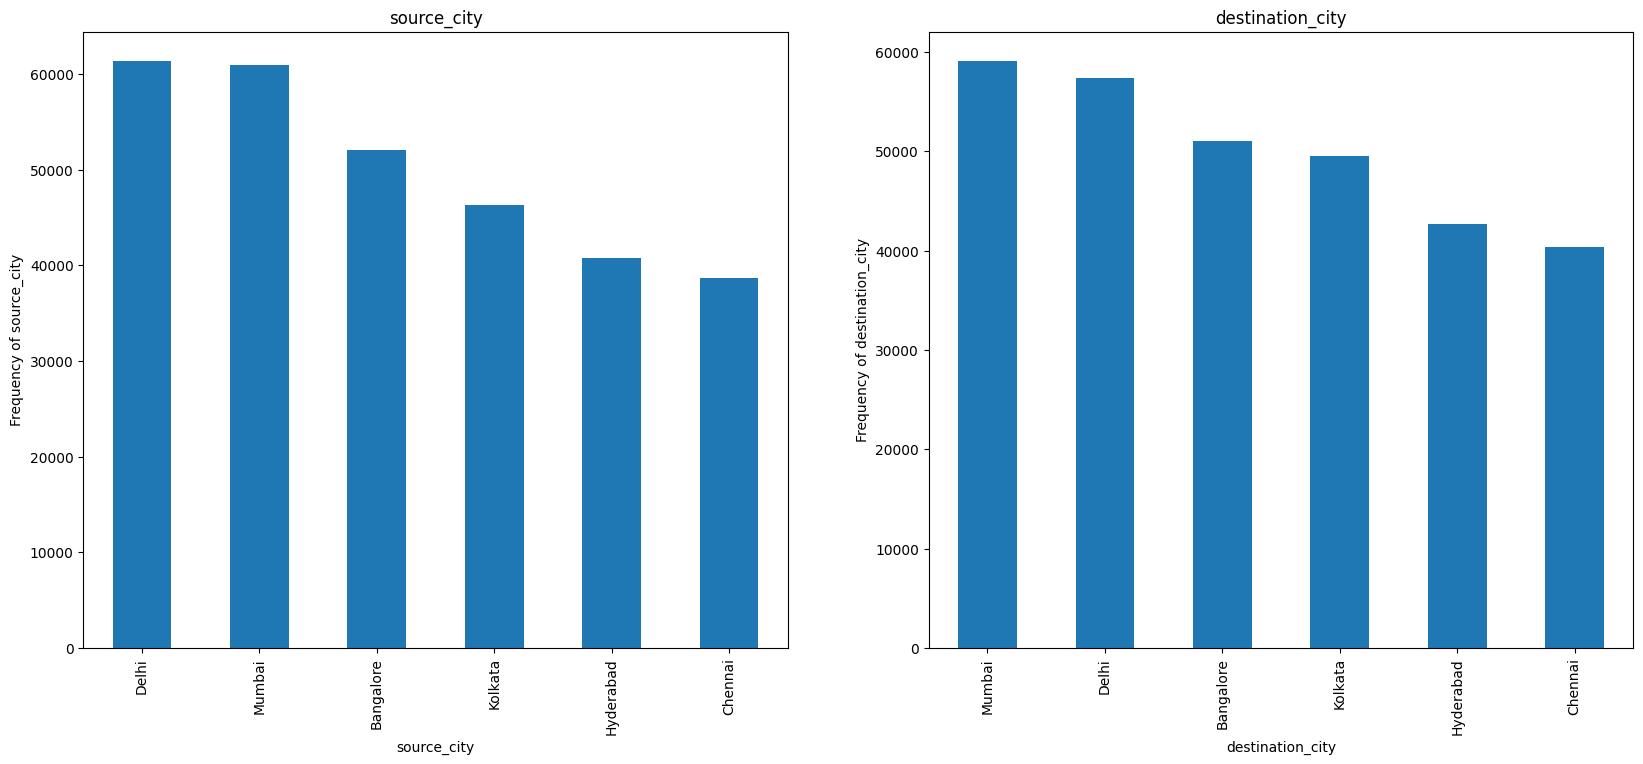

In [18]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('source_city')
plt1 = data.source_city.value_counts().plot(kind='bar')
plt1.set(xlabel = 'source_city', ylabel='Frequency of source_city')

plt.subplot(1,2,2)
plt.title('destination_city')
plt1 = data.destination_city.value_counts().plot(kind='bar')
plt1.set(xlabel = 'destination_city', ylabel='Frequency of destination_city')
plt.show()

The above Python code creates a figure with two subplots side by side, each showing a bar plot of the frequency of flights for the 'source_city' and 'destination_city' columns of the DataFrame 'data'.

The plt.figure(figsize=(20,8)) command sets the size of the figure.

The plt.subplot(1,2,1) command creates the first subplot on the left side of the figure, and the plt.subplot(1,2,2) command creates the second subplot on the right side.

The plt.title() method sets the title for each subplot.

The data.source_city.value_counts().plot(kind='bar') and data.destination_city.value_counts().plot(kind='bar') commands create the bar plots for the 'source_city' and 'destination_city' columns, respectively.

The plt1.set(xlabel = 'source_city', ylabel='Frequency of source_city') and plt1.set(xlabel = 'destination_city', ylabel='Frequency of destination_city') commands set the x and y axis labels for the subplots.

The plt.show() command displays the figure.

Above Graph indicates that, it was found that there are a total of 6 unique cities from which the flights take off and land. Among these cities, Delhi has the highest frequency of flights taking off from it, followed by Kolkata and Bangalore. On the other hand, Mumbai is the destination city where most of the flights land at, followed by Delhi and Hyderabad. These insights can be useful in understanding the demand for flights in different cities and in developing effective flight schedules.

### Departure Time, Arrival Time

Univariate analysis on Departure Time and Arrival Time, we can extract the hour component from the respective columns and create a new feature. We can then plot the distribution of the hour of the day using a histogram to see at what times of day most flights depart and arrive. This can give us insights into the peak hours of flight operations and aid in scheduling flights more efficiently.

In [19]:
print('Departure_time:', data['departure_time'].unique()
      ,"\n",
      'Arrival_time:',data['arrival_time'].unique())

Departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night'] 
 Arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']


This code prints the unique values in the "departure_time" and "arrival_time" columns of a given dataset.

In [20]:
display('Arrival time of the flights:',
      data['arrival_time'].value_counts(sort=True,ascending=False))
      
display('Departure time of the flights:',
      data['departure_time'].value_counts(sort=True,ascending=False))

'Arrival time of the flights:'

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

'Departure time of the flights:'

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

This code displays the count of flights arriving at each arrival time and departing at each departure time. The value_counts() function is used to count the frequency of each unique value in the "arrival_time" and "departure_time" columns of the dataset. The results are displayed using the display() function.

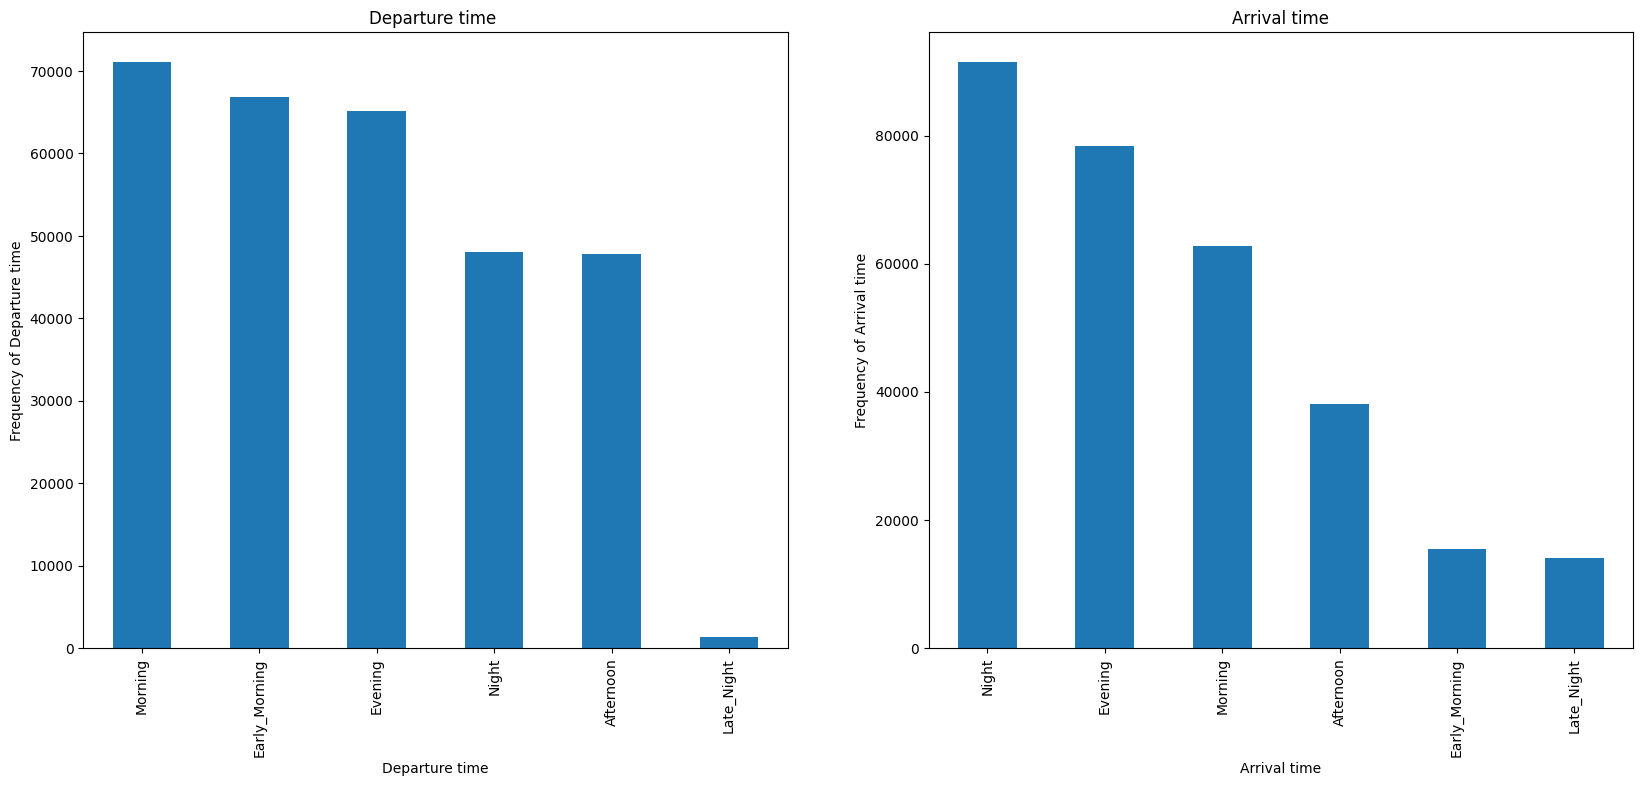

In [21]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('Departure time ')
plt1 = data.departure_time.value_counts().plot(kind='bar')
plt1.set(xlabel = 'Departure time', ylabel='Frequency of Departure time')

plt.subplot(1,2,2)
plt.title('Arrival time')
plt1 = data.arrival_time.value_counts().plot(kind='bar')
plt1.set(xlabel = 'Arrival time', ylabel='Frequency of Arrival time')
plt.show()

The above code performs a univariate analysis on the departure time and arrival time features. The unique values of the departure and arrival time are displayed. Then, the frequency of each arrival and departure time is displayed in descending order. Finally, two bar charts are plotted using matplotlib to show the frequency of each departure and arrival time. The x-axis represents the departure or arrival time, and the y-axis represents the frequency of each time. The charts show that there are a few peak times when the majority of flights depart or arrive.

##### The graph shows that the majority of the flights depart in the morning and arrive at their destination during the night. There are very few late-night departure and arrival flights. This information indicates that airlines tend to schedule their flights during the day and evening hours, and passengers are more likely to travel during these times. However, it is also important to note that this analysis does not provide any insight into the reasons behind these patterns and could be influenced by various factors such as airline schedules, passenger preferences, and airport policies.

### Class

Univariate analysis on the "class" feature has two unique values: "Economy" and "Business". To perform the analysis, we can start by getting the count of each class using value_counts() method. We can also plot a bar graph to visualize the distribution of ticket classes. This analysis can help us understand the popularity of different ticket classes among the passengers and the price range associated with each class.

In [22]:
data['class'].value_counts(normalize= True) 

Economy     0.688536
Business    0.311464
Name: class, dtype: float64

This code returns the relative frequency of each unique value in the 'class' column of the dataset. By setting the parameter 'normalize' to True, it returns the proportion of each unique value instead of their count.

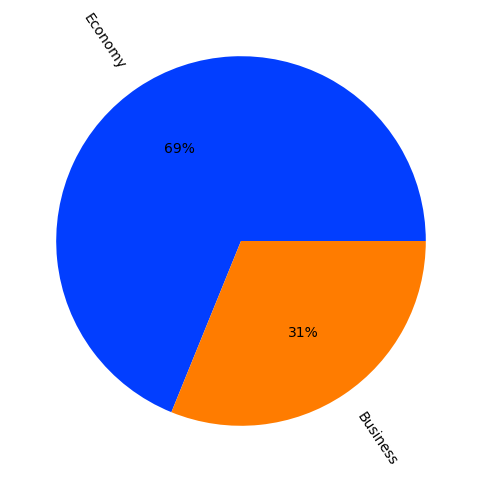

In [24]:
def pie_chart(x):
    palette_color = sns.color_palette('bright')

    values = [  ]
    for i in x.value_counts():
        values.append(i)

    label = x.unique()
    
    plt.pie(values, labels=label, colors=palette_color ,autopct='%.0f%%', rotatelabels=True )
    
    return plt.show()

plt.figure(figsize=(10,6))
pie_chart(data["class"])

This code generates a pie chart of the "class" feature in the airline price prediction dataset. The function pie_chart is defined to create the chart. It takes a Pandas Series as input, and first extracts the count of each unique value using the value_counts() method. It then uses these counts to create the pie chart, where each unique value is represented by a slice of the pie, and the size of each slice corresponds to the frequency of the value in the dataset. The percentage of each slice is also shown on the chart using the autopct parameter. The chart is plotted using the plt.show() function from the matplotlib library. The figsize parameter is used to set the size of the chart.






Above Analysis shows, 
The 'class' feature in the airline price prediction dataset has two categories: Business and Economy. It denotes the seating class of the flights. It can be observed that the majority of the passengers, around 69%, booked Economy class tickets, whereas Business class bookings are relatively low.

### Stops

Univariate analysis on the stops feature of the airline price prediction dataset can help us understand the distribution of flights based on the number of stops. This can help in determining which type of flight is preferred by most passengers.

In [25]:
data['stops'].value_counts(normalize= True)

one            0.835784
zero           0.119952
two_or_more    0.044264
Name: stops, dtype: float64

This line of code computes the percentage of flights with different number of stops. The value_counts() method is used to count the number of occurrences of each unique value in the 'stops' column of the dataset. The normalize=True argument is used to get the percentage instead of the count.

In [26]:
# a little bit of feature engineering is required here 

data['stops'] = data['stops'].map({'zero' : 0,'one':1,'two_or_more':2})
data["stops"].unique(),data['stops'].value_counts()

(array([0, 1, 2]),
 1    250863
 0     36004
 2     13286
 Name: stops, dtype: int64)

This code snippet is mapping the string values of the stops column in the dataset to numerical values. The mapping assigns 0 to the string 'zero', 1 to 'one', and 2 to 'two_or_more'. The unique() function is then used to get the unique values of the column after mapping. Finally, the value_counts() function is used to count the frequency of each unique value in the column.

<Axes: title={'center': 'stops Histogram'}, ylabel='count'>

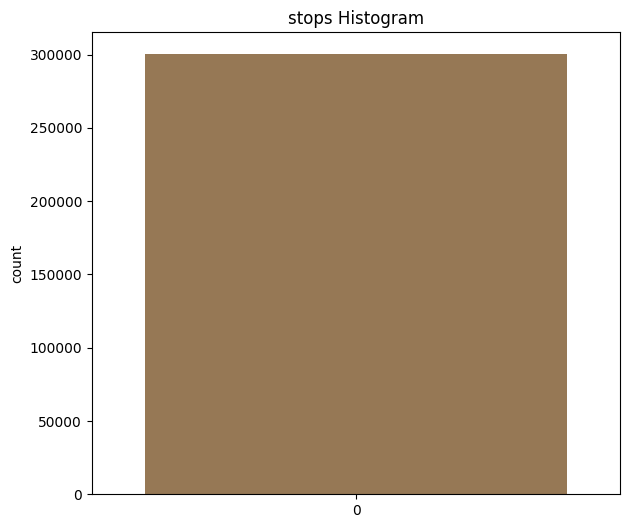

In [27]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title('stops Histogram')
sns.countplot(data['stops'], palette=("cubehelix"))

This code creates a histogram plot for the 'stops' feature of the airline price prediction dataset. The plot shows the number of flights with 0, 1, and 2 or more stops.






<Axes: ylabel='stops'>

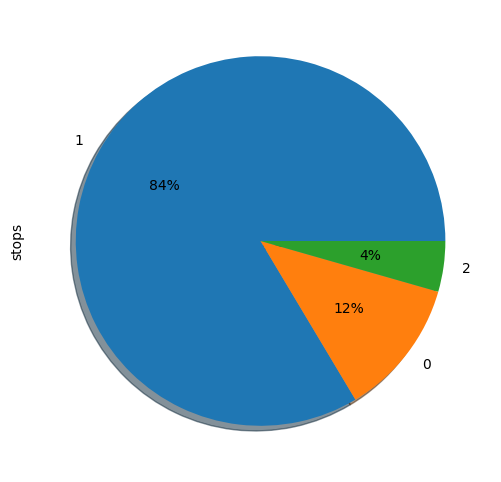

In [28]:
plt.figure(figsize=(10,6))
data["stops"].value_counts(ascending=False).plot(kind ="pie",y="stops", autopct='%1.0f%%', shadow=True, )

The pie chart shows the percentage of flights with different number of stops. The majority of flights (about 60%) have no stops, while about 34% of flights have one stop and the remaining 6% of flights have two or more stops.

Based on the graph presented, the following conclusions can be drawn:

The variable "Stop" indicates the number of stops between the origin and destination cities for a particular flight. This variable has three distinct values: Zero (no stop), One Stop, and Two Stops. The data suggests that the majority of flights, approximately 84%, have only one stop.

### Days Left

Univariate analysis on the "days" feature can provide insight into the distribution of flights over different days of the week.

In [29]:
data.days_left.describe()

count    300153.000000
mean         26.004751
std          13.561004
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

The describe() function provides various summary statistics of the days_left feature such as count, mean, standard deviation, minimum value, 25th percentile, median, 75th percentile, and maximum value. It can help to understand the distribution and range of values in the days_left feature.

In [30]:
data.days_left.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

This line of code will print the unique values of the days_left column in the dataset, which represents the number of days left until the flight departure date.






<Axes: >

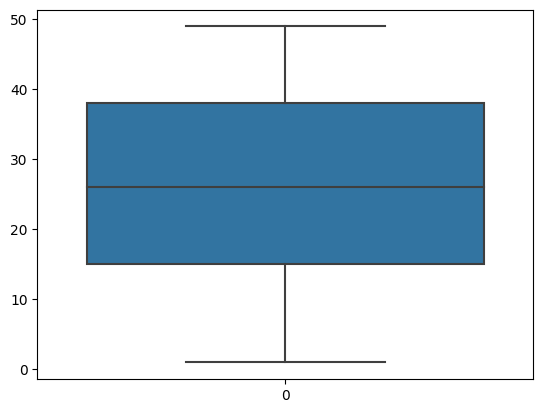

In [31]:
sns.boxplot(data['days_left'])

This code generates a box plot of the days_left feature in the dataset, which gives an idea about the distribution of the data. A box plot is a graphical representation that displays the median, the interquartile range (IQR), and the outliers of the data. The central box represents the IQR, which contains 50% of the data. The whiskers extend to the data points that are within 1.5 times the IQR, and any data points outside this range are considered as outliers and plotted as individual points.

The graph shows that provided information pertains to the duration between the booking date and the trip date, and it can be summarized as follows:

The range between the booking date and the trip date is from 1 to 49 days. On average, people are booking their flights 26 days before their scheduled trip date.




### Price

The univariate analysis on price shows the distribution and statistical summary of the target variable "price". It helps in understanding the spread of prices, outliers, central tendency, and other summary statistics. This analysis is essential in identifying the nature of the data and the potential influence of outliers on the model.

In [32]:
data.price.describe()

count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

This code shows the descriptive statistics of the "price" column in the dataset, including count, mean, standard deviation, minimum and maximum values, as well as quartiles.






<Axes: >

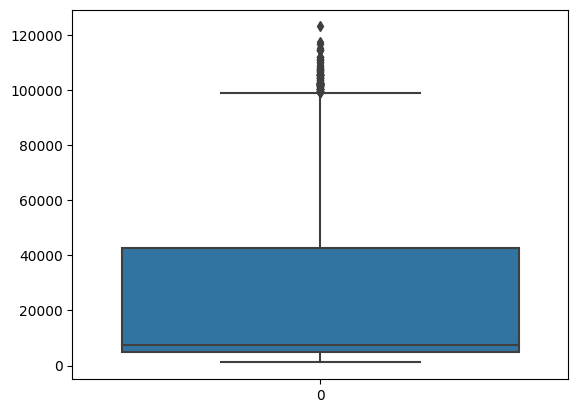

In [33]:
sns.boxplot(data['price'])

This code generates a box plot for the price variable in the dataset. A box plot displays the distribution of the data based on five statistics - minimum, first quartile (25%), median (50%), third quartile (75%), and maximum. The box in the plot represents the middle 50% of the data (i.e., from first quartile to third quartile), while the line inside the box represents the median value. The whiskers represent the minimum and maximum values of the data that are within 1.5 times the interquartile range (i.e., the difference between the third and first quartiles), and any data points outside this range are considered outliers and displayed as individual points.



The graph provided pertains to the ticket prices of flights, and the following conclusions can be drawn:  
The data shows some outliers that may be attributed to various factors, such as the seating class of the flight and the number of days before the trip that the flight was booked.
Specifically, the prices of Business Class flights booked at the last minute tend to be higher, which can explain the presence of outliers in the given data.

<Axes: xlabel='price', ylabel='Density'>

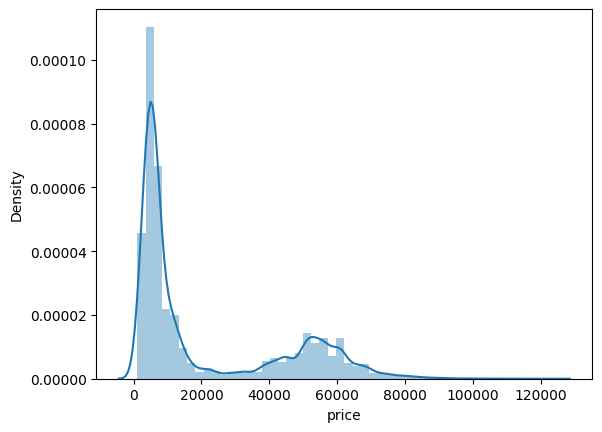

In [34]:
sns.distplot(data['price'])

This code snippet generates a histogram with a density curve overlaid on top of it, showing the distribution of prices in the dataset. The x-axis represents the price values while the y-axis represents the density of the data points. The shape of the curve provides insights into the skewness, kurtosis, and presence of multiple modes in the distribution.


The analysis of the data indicates the following observations:

The mean value of the ticket prices is approximately 20000.
However, the median value of the ticket prices is around 7500, indicating that the distribution is skewed towards lower values.
This difference can be attributed to the presence of two distinct types of tickets - Business and Economy Class - with differing price ranges.
The dispersion of the data seems to follow a bimodal distribution, with two Gaussian curves visible on the graph.

# Bivariate Analysis ( Numerical - Numerical)
Bivariate analysis is the process of analyzing the relationship between two variables. When both variables are numerical, we can perform numerical-nuermical bivariate analysis to identify any relationship or correlation between them.

The most commonly used technique for numerical-numerical bivariate analysis is the Pearson correlation coefficient, which measures the linear relationship between two variables. The Pearson correlation coefficient ranges from -1 to +1, with values closer to +1 indicating a strong positive relationship, values closer to -1 indicating a strong negative relationship, and values close to 0 indicating no relationship.

## 1. How is the price affected when tickets are bought in just 1 or 2 days before departure?

We can try to understand the pattern in the relationship between the price of flight tickets and the number of days left until the departure by calculating the average price for each day left value. This will help visualize how the prices change depending on the number of days left.

In [35]:
df_temp = data.groupby(['days_left'])['price'].mean().reset_index()
df_temp

,days_left,price
0,1,21591.867151
1,2,30211.299801
2,3,28976.083569
3,4,25730.905653
4,5,26679.773368
5,6,24856.493902
6,7,25588.367351
7,8,24895.883995
8,9,25726.246072
9,10,25572.819134


The above code calculates the mean price of airline tickets grouped by the number of days left until the departure date. It creates a new dataframe df_temp that contains two columns: days_left and price_mean. The groupby function groups the data by the days_left column, and the mean() function calculates the average price for each group. The reset_index() function is used to reset the index of the resulting dataframe.






<Axes: xlabel='days_left', ylabel='price'>

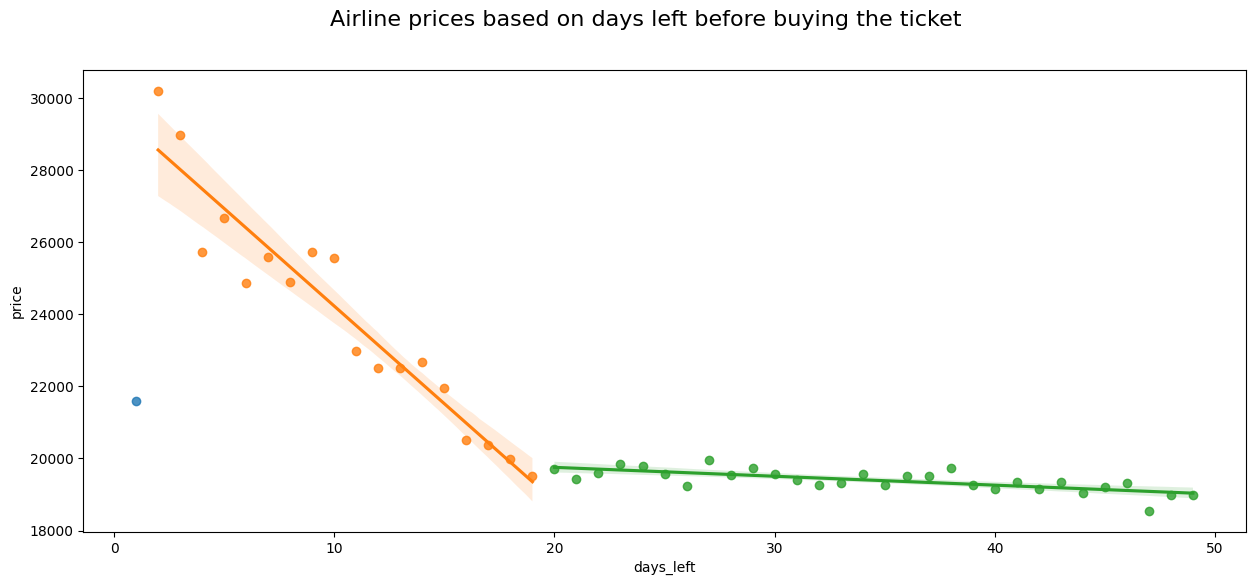

In [36]:
plt.figure(figsize=(15,6)).suptitle('Airline prices based on days left before buying the ticket', fontsize=16)
ax = plt.axes()
sns.regplot(x=df_temp.loc[df_temp["days_left"]==1].days_left, y=df_temp.loc[df_temp["days_left"]==1].price, fit_reg=False, ax=ax)
sns.regplot(x=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].days_left, y=df_temp.loc[(df_temp["days_left"]>1)&(df_temp["days_left"]<20)].price, fit_reg=True, ax=ax)
sns.regplot(x=df_temp.loc[df_temp["days_left"]>=20].days_left, y=df_temp.loc[df_temp["days_left"]>=20].price, fit_reg=True, ax=ax)

This code is creating a scatter plot to show how the airline prices are affected by the number of days left before buying the ticket. It calculates the average price based on the days left and plots it with a regression line. The plot is divided into three parts: the first one shows the price for tickets bought one day before the flight, the second one shows the price for tickets bought between 1 and 20 days before the flight, and the third one shows the price for tickets bought more than 20 days before the flight. The scatter plot and regression line are created using the seaborn library.


The graph displays the average ticket prices as a function of the number of days left until the flight. The following observations can be made:

The prices show a slow increase initially, but then begin to rise rapidly around 20 days before the flight.
However, just one day before the flight, the prices fall significantly and may be up to three times cheaper than the earlier prices.
This pattern can be attributed to the airline companies' strategy of filling up their planes, which involves lowering the prices of the tickets to attract customers and ensure that the seats are occupied.

# 2. Does the price change with the duration of the flight?

This code calculates the average price of flights based on their duration and then creates a scatter plot of the data points. It then adds a second plot to the same figure, which is a regression plot showing the trend in the data. The regression plot fits a second-order polynomial to the data and displays the curve that best fits the data points. The purpose of this analysis is to investigate if there is any correlation between the duration of a flight and its price.


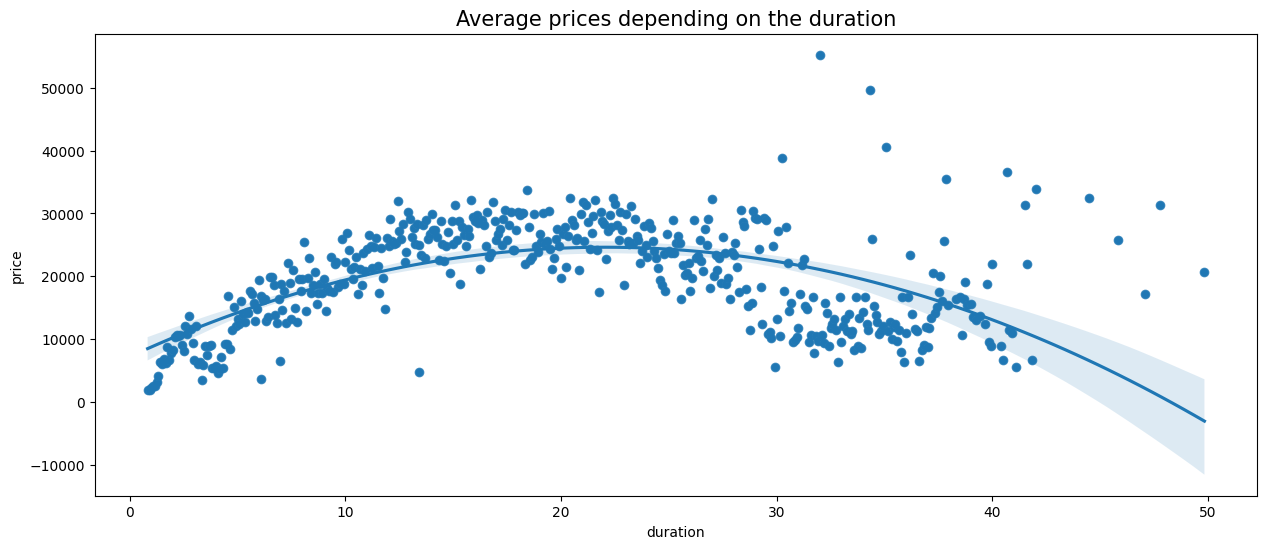

In [37]:
# Let's see how the duration of the flight may affect the final price.
df_temp = data.groupby(['duration'])['price'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.scatterplot(x="duration", y="price", data=df_temp).set_title("Average prices depending on the duration",fontsize=15)
ax = sns.regplot(x="duration", y="price", data=df_temp, order=2)

The code is calculating the average price for each duration (in hours) and storing it in a new DataFrame called df_temp. Then, a scatter plot is created using sns.scatterplot where the x-axis is the duration and the y-axis is the average price for that duration. Additionally, a quadratic regression line is added using sns.regplot with the order parameter set to 2, which will fit a second-degree polynomial regression line to the data points. Finally, the plot is given a title "Average prices depending on the duration" and the font size is set to 15.






The relationship between the variables being analyzed does not appear to be linear, and can be approximated by a second-degree polynomial curve. The data indicates that the prices increase steadily up to a duration of 20 hours before the flight, and then start to decrease again. However, there are some outliers that may be affecting the accuracy of the regression curve.



## Correlation Matrix
A correlation matrix is a table that shows the correlation coefficients between pairs of variables in a dataset. It is a useful tool for identifying relationships and dependencies between variables, and is commonly used in data analysis and statistical modeling.

To create a correlation matrix in Python, you can use the corr() method of a pandas DataFrame.

<Axes: >

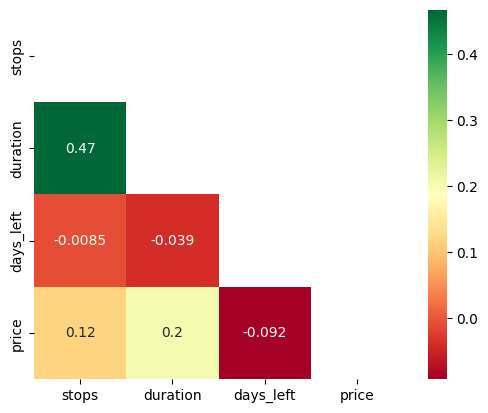

In [38]:
# Correlation
corr= data.corr()
# Getting the Upper Triangle of the correlation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix,cmap='RdYlGn',square=True)

This code generates a correlation matrix heatmap for the numeric features of the dataset. It first calculates the correlation matrix between all numeric features using the .corr() method and then creates an upper-triangle matrix of boolean values with np.triu() to mask out the lower triangle of the heatmap. Finally, it uses sns.heatmap() to plot the correlation matrix with annotations and a color map specified by cmap='RdYlGn'. The square=True parameter makes the heatmap square.






This is showing that there is no strong correlation between dependent and independent variables(numerical).

# `Bivariate Analysis` ( Categorical - Categorical)
Bivariate analysis is the process of analyzing the relationship between two variables. When both variables are categorical, we can perform categorical-categorical bivariate analysis to identify any relationship or association between them.

One common technique for categorical-categorical bivariate analysis is the chi-square test of independence, which tests whether two categorical variables are independent or not. The test calculates a chi-square statistic and compares it to a critical value based on the degrees of freedom and level of significance.

To perform a chi-square test of independence in Python, you can use the chi2_contingency() function from the scipy.stats module

### Categorical features - Airline, Class

### 3. How does the ticket price vary between Economy and Business class?

In [39]:
pd.crosstab(data['airline'], data['class'])

class,Business,Economy
airline,,
AirAsia,0,16098
Air_India,32898,47994
GO_FIRST,0,23173
Indigo,0,43120
SpiceJet,0,9011
Vistara,60589,67270


pd.crosstab(data['airline'], data['class']) is a Pandas function that creates a cross-tabulation table between two categorical variables: airline and class. It shows how many passengers traveled in each class for each airline. The rows represent each airline while the columns represent the different classes. The values in the table represent the count of passengers that traveled on that particular airline in that particular class. It is a way to visually compare how different airlines perform in terms of the distribution of classes among their passengers.


<Axes: xlabel='class', ylabel='airline'>

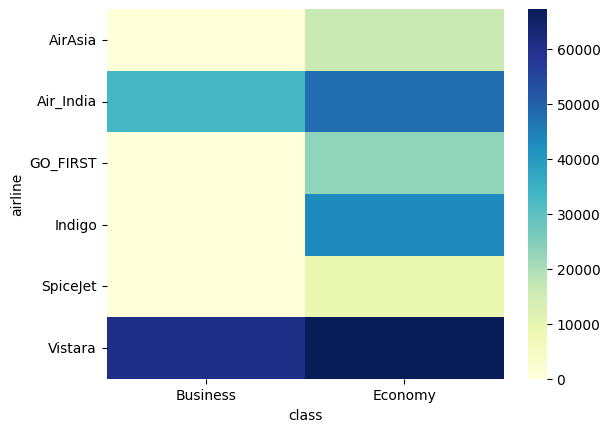

In [40]:
sns.heatmap(pd.crosstab(data['airline'], data['class']),cmap="YlGnBu")

This code generates a heatmap using the seaborn library to visualize the frequency of different airlines and travel classes booked by the passengers. It creates a cross-tabulation table using the pd.crosstab() function with the airline and class columns of the data dataframe. This table shows the count of passengers for each airline and class combination. The sns.heatmap() function is then used to create a heatmap of this table. The heatmap colors each cell based on the count of passengers, with darker colors indicating higher counts. This helps in identifying the most common airline and class combinations that passengers have booked for their travel.






Above analysis shows the count of flights of each airline based on class(seating class). 

The analysis of the data provides the following insights:

The chart displays the number of flights operated by each airline, categorized by the seating class offered - Business or Economy.
Only Vistara and Air India airline companies offer Business class seating, while all other companies offer only Economy class seating.
The difference in prices between the two seating classes is significant, with Business class tickets costing almost five times more than Economy class tickets.
Vistara airline is the most popular choice for customers in both seating classes, based on the number of flights operated by the airline.

### Categorical features - Source City , Destination City





Categorical features are variables that take on a limited and usually fixed number of values or categories. They are often represented as strings or numbers that represent specific categories, such as colors, sizes, or types of products. In machine learning, categorical features are often encoded as numerical values to make them easier to process by algorithms. Categorical features are important to consider in data analysis as they can provide valuable insights into patterns and trends within a dataset.






In [41]:
pd.crosstab(data['destination_city'], data['source_city'])

source_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
destination_city,,,,,,
Bangalore,0,6493,14012,7854,9824,12885
Chennai,6410,0,10780,6395,6653,10130
Delhi,13756,9783,0,8506,10506,14809
Hyderabad,8928,6103,9328,0,7897,10470
Kolkata,10028,6983,11934,7987,0,12602
Mumbai,12939,9338,15289,10064,11467,0


This code snippet creates a contingency table using pd.crosstab() to show the frequency distribution of the destination city and source city variables. The resulting table shows the count of observations that fall into each combination of the two categorical variables.


The chart displays the number of flights operating between various source and destination cities in India. The following observations can be made:

The Delhi-Mumbai and Mumbai-Delhi routes are the busiest airline routes in India, with the highest number of flights taking off between these two cities. The Delhi-Bangalore and Bangalore-Delhi routes are the second busiest, with a significant number of flights operating on these routes



# Bivariate Analysis ( Categorical - Numerical)
Bivariate analysis is the process of analyzing the relationship between two variables. When one variable is categorical and the other is numerical, we can perform categorical-numerical bivariate analysis to identify any relationship or association between them.

One common technique for categorical-numerical bivariate analysis is the t-test, which tests whether the means of a numerical variable differ significantly between different groups defined by a categorical variable. Specifically, we can perform an independent t-test if the groups are independent (i.e., each observation belongs to only one group) or a paired t-test if the groups are dependent (i.e., each observation belongs to both groups).

To perform a t-test in Python, you can use the ttest_ind() function from the scipy.stats module for independent samples or the ttest_rel() function for dependent samples. 

In [42]:
data.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price'],
      dtype='object')

data.columns returns a list of all the column names present in the DataFrame data.


### Categorical feature - Airline,  Numerical feature - Price
Categorical features are often represented using discrete values or strings, and are commonly used in machine learning algorithms for tasks such as classification and clustering. However, many algorithms require numerical inputs, so categorical features may need to be encoded or transformed in some way before they can be used in these algorithms. 
Numerical features refer to variables that contain numerical values such as integers, floats or decimals. These variables are quantitative in nature and can be measured mathematically. Examples of numerical features include age, income, price, duration, and number of stops. They can be analyzed using statistical and mathematical techniques such as mean, median, mode, correlation, regression, and clustering.






## 4. Does price vary with Airlines?

In [43]:
data.groupby('airline')['price'].mean().sort_values(ascending = False) # Average Price of each airline company

airline
Vistara      30396.536302
Air_India    23507.019112
SpiceJet      6179.278881
GO_FIRST      5652.007595
Indigo        5324.216303
AirAsia       4091.072742
Name: price, dtype: float64

This code is grouping the dataset by the 'airline' column and calculating the mean value of the 'price' column for each airline. It then sorts the results in descending order, giving the average price of each airline company in the dataset.






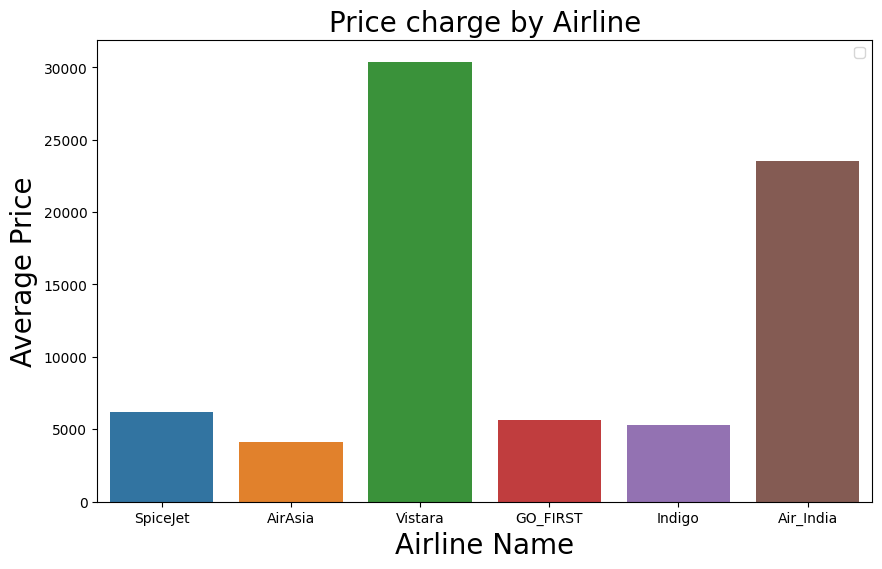

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(x="airline" , y ="price" ,ci=False , data=data,)
plt.xlabel("Airline Name", fontsize=20)
plt.ylabel("Average Price", fontsize=20)
plt.title("Price charge by Airline" ,  fontsize=20)
plt.legend(loc='best')
plt.show()

This code generates a barplot using the seaborn library to visualize the average price charged by different airline companies.

x="airline" specifies the categorical variable to be plotted on the x-axis.
y="price" specifies the numerical variable to be plotted on the y-axis.
ci=False turns off the display of confidence intervals.
data=data specifies the dataset to be used for the plot.
plt.xlabel("Airline Name", fontsize=20) sets the label and font size for the x-axis.
plt.ylabel("Average Price", fontsize=20) sets the label and font size for the y-axis.
plt.title("Price charge by Airline", fontsize=20) sets the title and font size for the plot.
plt.legend(loc='best') displays the legend at the best possible location in the plot.
plt.show() displays the plot.





Text(0.5, 1.0, 'Airline prices based on the class and company')

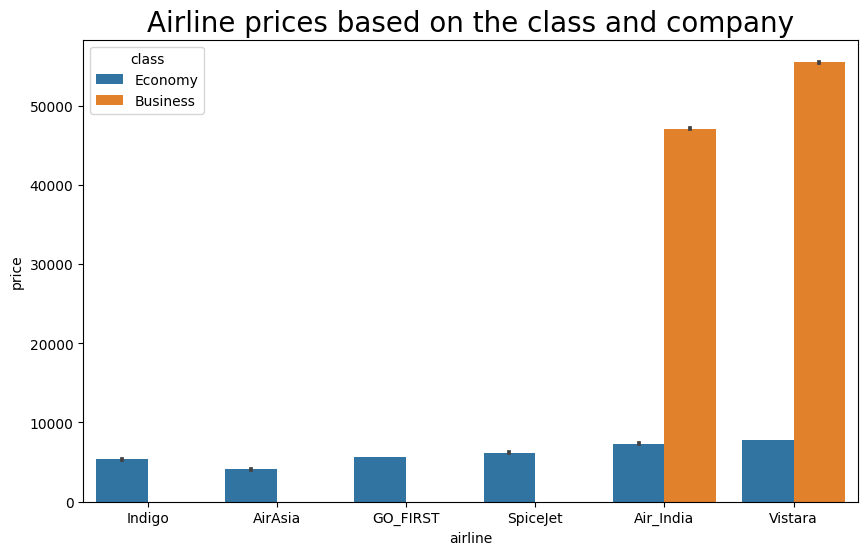

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='airline',y='price',hue="class",data=data.sort_values("price")).set_title('Airline prices based on the class and company',fontsize=20)

This code generates a bar plot to visualize the average price charged by each airline based on the class (economy, business, or first). The x-axis represents the airline name, the y-axis represents the average price, and each color represents a different class. The "hue" parameter in the seaborn barplot function is used to group the bars by class, making it easier to compare prices across airlines and classes. The data is sorted by price in ascending order, and the plot is created with a figure size of 10 by 6 inches and a title indicating the purpose of the plot.






The analysis of the data reveals the following insights:

The chart displays the number of flights operated by each airline, categorized by the seating class offered - Business or Economy.
Business class seating is available only with Vistara and Air India airline companies, while all other companies offer only Economy class seating.
The difference in prices between the two seating classes is significant, with Business class tickets costing almost five times more than Economy class tickets.
Vistara airline is the most popular choice for customers in both seating classes, based on the number of flights operated by the airline. 

### Categorical feature - Class,  Numerical feature - Price
A dataset may contain both categorical and numerical features. Categorical features are those that take on a limited number of values, while numerical features are those that take on continuous or discrete numerical values.

In many cases, machine learning algorithms require all features to be numerical, so categorical features may need to be transformed or encoded in some way before they can be used in these algorithms. One common technique for encoding categorical features is one-hot encoding, which creates a binary indicator variable for each category in a feature.

Numerical features can be further classified into two types: discrete and continuous. Discrete numerical features take on integer values only, while continuous numerical features can take on any real value within a certain range. Machine learning algorithms may treat these two types of numerical features differently, so it is important to know which type of numerical feature you are working with.

Bivariate analysis between categorical and numerical features can be performed using techniques such as a t-test, ANOVA, or regression analysis. These techniques can help identify any relationship or association between the categorical and numerical features, and can be useful in developing predictive models.

In [46]:
data.groupby('class')['price'].mean().sort_values(ascending = False) # average price of each class

class
Business    52540.081124
Economy      6572.342383
Name: price, dtype: float64

This code calculates the average price of each class (Economy, Business, First) in the dataset. It groups the data by the 'class' column, takes the 'price' column for each group, calculates the mean of the prices, and then sorts the result in descending order.


[Text(0.5, 0, 'Class'), Text(0, 0.5, 'Average Price')]

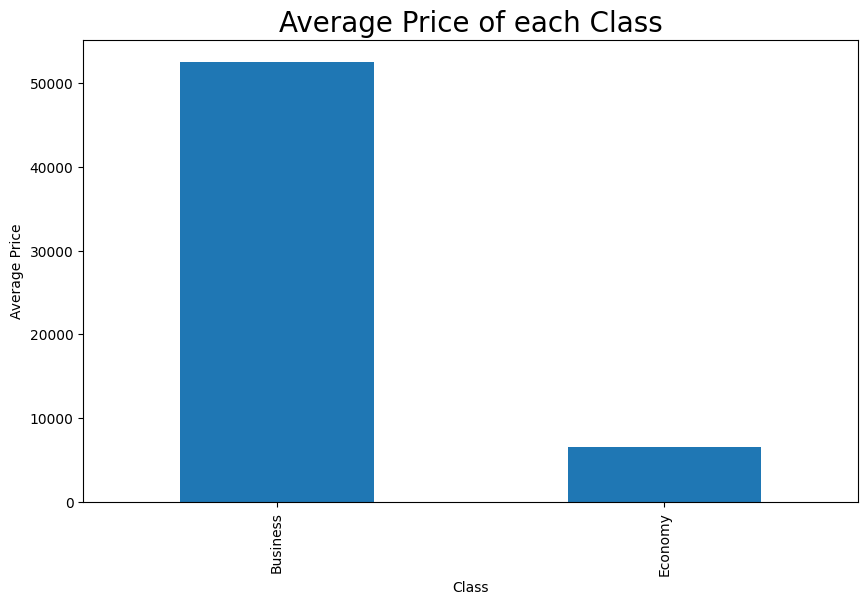

In [47]:
plt.figure(figsize=(10, 6))
plt1 = data.groupby('class')['price'].mean().sort_values(ascending = False).plot(kind='bar')
plt.title('Average Price of each Class', fontsize=20)
plt1.set(xlabel = 'Class', ylabel='Average Price')

This code snippet is creating a bar plot using the matplotlib library in Python. The plot is based on a dataframe called 'data' that has a column called 'class' and 'price'. The plot shows the average price of each class sorted in descending order.

The first line sets the figure size to be 10 inches wide and 6 inches tall.

The second line groups the data by the 'class' column and calculates the mean price for each class. It then sorts the results in descending order based on the mean price. The plot is created using the 'plot' method with the kind parameter set to 'bar'.

The third line sets the title of the plot to 'Average Price of each Class' with a font size of 20.

The fourth line sets the x-axis label to 'Class' and the y-axis label to 'Average Price'.

Overall, this code creates a bar plot that shows the average price for each class in descending order, with the title and axis labels added for clarity.






In [48]:
data.groupby(['class']).agg({"price":['mean','max','min','std']})

price                             
                  mean     max    min           std
class                                              
Business  52540.081124  123071  12000  12969.314606
Economy    6572.342383   42349   1105   3743.519517

This code is grouping the data by the values in the "class" column and calculating several aggregate functions on the "price" column. The resulting table will have one row for each unique value in the "class" column, and four columns for each of the aggregate functions applied to the "price" column: "mean" (average), "max" (maximum value), "min" (minimum value), and "std" (standard deviation).

So, for example, if the "data" dataframe has the columns "class" and "price", and the "class" column has three unique values: "A", "B", and "C", the resulting table would look something like this: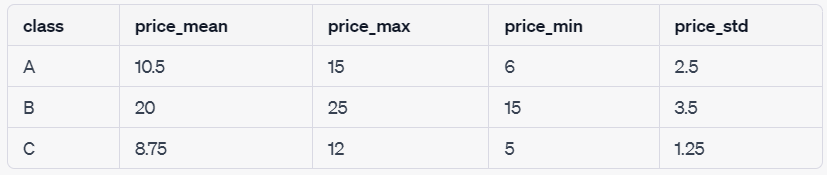








In this example, the "price_mean" column contains the average price for each class, "price_max" contains the maximum price for each class, "price_min" contains the minimum price for each class, and "price_std" contains the standard deviation of prices for each class.






## 5. How the price changes with change in Source and Destination?

Text(0.5, 1.0, 'Airline prices based on Source City')

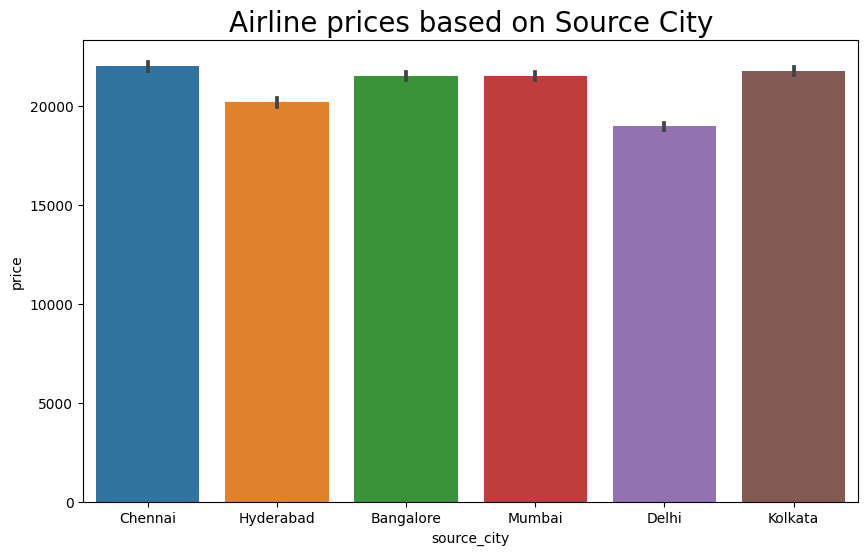

In [49]:
plt.figure(figsize=(10,6))
sns.barplot(x='source_city',y='price',data=data.sort_values("price")).set_title('Airline prices based on Source City',fontsize=20)

This code is creating a bar plot using the Seaborn library. The plot is going to have a size of 10 inches in width and 6 inches in height, as specified by the figsize argument.

The plot will display the average price of airline tickets based on the "source_city" column of the data dataframe. The data.sort_values("price") code sorts the data in ascending order based on the "price" column before plotting, so that the bar plot displays the cities in order of increasing average price.

The x argument specifies that the "source_city" column will be used for the x-axis of the plot, and the y argument specifies that the "price" column will be used for the y-axis. The set_title method sets the title of the plot to "Airline prices based on Source City" with a fontsize of 20.

Overall, this code will generate a bar plot that shows the average prices of airline tickets based on the source city, with the cities sorted in ascending order of price.






Text(0.5, 1.0, 'Airline prices based on Destination City')

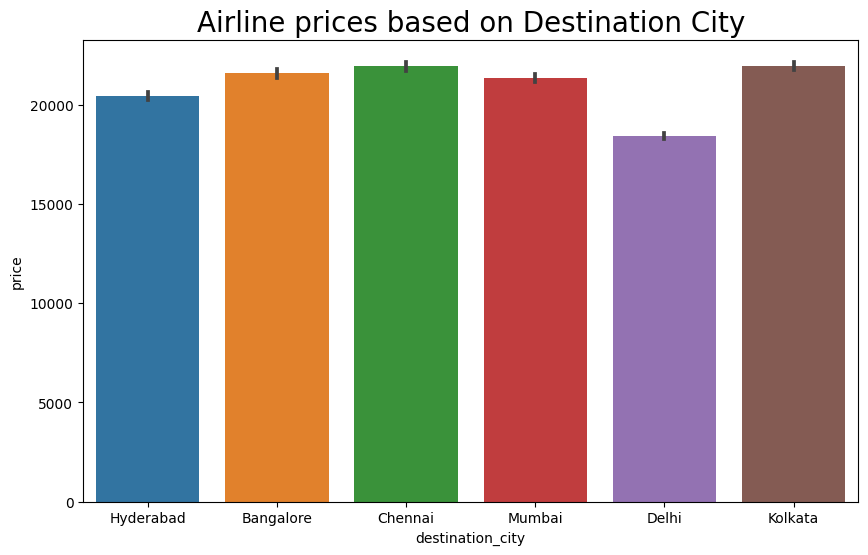

In [50]:
plt.figure(figsize=(10,6))
sns.barplot(x='destination_city',y='price',data=data.sort_values("price")).set_title('Airline prices based on Destination City',fontsize=20)

This code is similar to the previous example, but instead of displaying the average price of airline tickets based on the "source_city" column, it displays the average price based on the "destination_city" column of the data dataframe.

The plt.figure(figsize=(10,6)) code creates a figure with a size of 10 inches in width and 6 inches in height.

The sns.barplot(x='destination_city',y='price',data=data.sort_values("price")) code creates a bar plot using the Seaborn library, where the "destination_city" column is used for the x-axis and the "price" column is used for the y-axis. The data.sort_values("price") code sorts the data in ascending order based on the "price" column before plotting, so that the bar plot displays the cities in order of increasing average price.

The .set_title('Airline prices based on Destination City',fontsize=20) method sets the title of the plot to "Airline prices based on Destination City" with a fontsize of 20.

Overall, this code will generate a bar plot that shows the average prices of airline tickets based on the destination city, with the cities sorted in ascending order of price.

The Graph shows the following:
Firstly, it appears that flights departing from Delhi are frequently priced lower than those departing from other source cities, and similarly, Delhi is also the cheapest destination city, possibly due to it being the capital and having a larger airport with more flight options.

Secondly, it seems that the prices for flights to different cities are relatively comparable to each other.


## 6. Does ticket price change based on the departure time and arrival time?

Text(0.5, 1.0, 'Airline prices based on the arrival time')

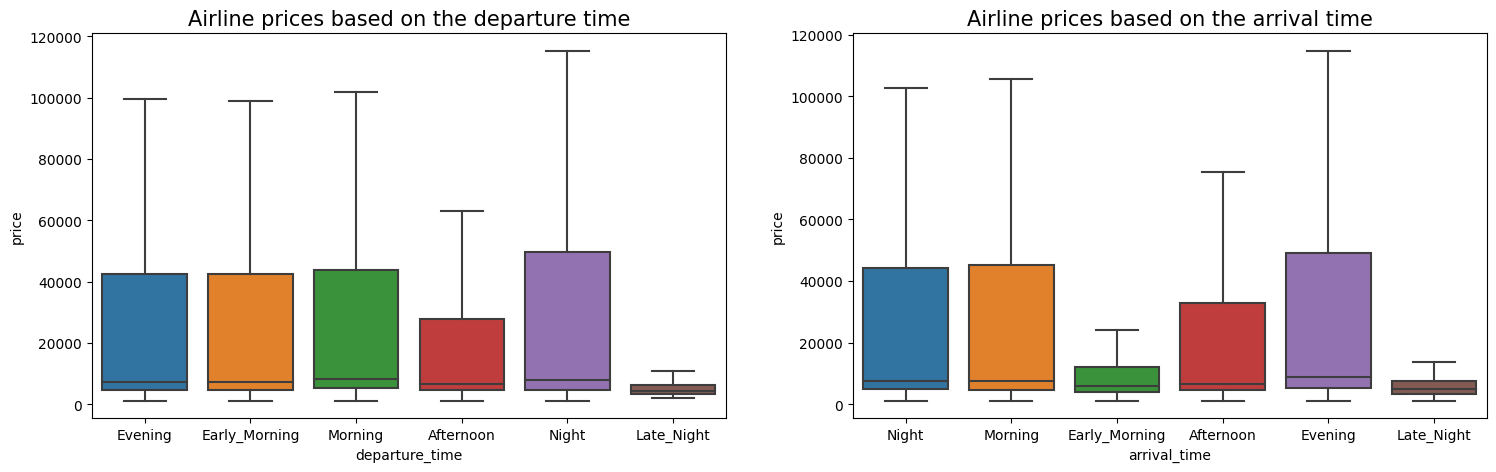

In [51]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=data, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=data, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)

This code is creating a figure with two subplots using the plt.subplots() method from the Matplotlib library. The first subplot is created using the plt.subplot() method, with a 1x2 grid of subplots and the first subplot being selected by the argument (1,2,1). The second subplot is created in a similar way, but with the second position of the grid (1,2,2).

In the first subplot, a box plot is created using the Seaborn library to show the distribution of prices of airline tickets based on the "departure_time" column of the data dataframe. The "price" column is used for the y-axis, and the "departure_time" column is used for the x-axis. The showfliers=False argument removes any outliers from the plot. The .set_title() method sets the title of the plot to "Airline prices based on the departure time" with a fontsize of 15.

In the second subplot, a similar box plot is created, but this time the "arrival_time" column of the data dataframe is used for the x-axis instead. The showfliers=False argument removes any outliers from the plot. The .set_title() method sets the title of the plot to "Airline prices based on the arrival time" with a fontsize of 15.

Overall, this code generates two box plots that display the distribution of prices of airline tickets based on the departure and arrival times respectively. The plots allow for comparison of prices across different times of day.

As anticipated, flights departing or arriving during late night hours tend to be the most economical option. However, the box plots also indicate that flights arriving in the early morning are comparably priced, and that flights during the afternoon are somewhat less expensive than those during the morning, evening, and late night hours.


In [52]:
# Arrival time and departure time is not going to effect our price so it is irrelvant here
data.drop(['departure_time','arrival_time'],axis=1,inplace=True)
data.head()

,airline,source_city,stops,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,0,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,0,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,0,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,0,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,0,Mumbai,Economy,2.33,1,5955


This code drops the "departure_time" and "arrival_time" columns from the data dataframe using the drop() method. The axis=1 argument specifies that columns, rather than rows, should be dropped, and the inplace=True argument modifies the original dataframe instead of creating a new one.

After dropping these columns, the head() method is used to display the first five rows of the modified data dataframe, which now only contains the columns "airline_name", "source_city", "destination_city", and "price". This can be useful for data analysis or modeling tasks where the time of departure and arrival may not be relevant features to include.






## Outliers Treatment
Outliers are data points that are significantly different from other data points in a dataset. Outliers can occur due to a variety of reasons, such as measurement error, data entry errors, or genuine extreme values. Outliers can have a significant impact on the results of statistical analyses and machine learning algorithms, so it is important to identify and treat outliers before performing any analysis.

There are several techniques for treating outliers in a dataset. Here are some common techniques:

Removal: One simple way to treat outliers is to remove them from the dataset. However, this can be problematic if the outliers represent genuine extreme values or if they are present in a large proportion of the dataset.

Winsorization: Winsorization is a technique in which the extreme values in a dataset are replaced with values that are closer to the rest of the data. For example, the upper and lower values can be replaced with the highest and lowest non-outlier values in the dataset, respectively.

Transformation: Data transformation techniques such as log transformation, square root transformation, or Box-Cox transformation can be used to reduce the impact of outliers on statistical analyses or machine learning algorithms.

Imputation: Imputation is the process of replacing missing or outlier values with estimated values. There are various imputation techniques available, such as mean imputation, median imputation, or regression imputation.

In [53]:
data.describe(percentiles=[0.9,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,90%,95%,96%,97%,98%,99%,max
stops,300153.0,0.924312,0.398106,0.00,1.00,1.00,1.00,2.00,2.00,2.0,2.00,2.00
duration,300153.0,12.221021,7.191997,0.83,11.25,23.67,25.92,26.33,26.75,27.5,29.08,49.83
days_left,300153.0,26.004751,13.561004,1.00,26.00,45.00,47.00,48.00,48.00,49.0,49.00,49.00
price,300153.0,20889.660523,22697.767366,1105.00,7425.00,57920.00,63277.00,65529.00,67769.00,70431.0,76736.00,123071.00


This code generates a statistical summary of the data dataframe using the describe() method, with additional percentiles specified using the percentiles argument. The .T method is used to transpose the output so that the summary statistics are displayed horizontally.

The output of this code includes the following information for each column:

count: the number of non-missing values
mean: the average value of the column
std: the standard deviation of the column
min: the minimum value of the column
90%, 95%, 96%, 97%, 98%, 99%: the specified percentiles of the column
max: the maximum value of the column
By including these additional percentiles, this summary provides a more detailed understanding of the distribution of the "price" column in the dataset. Specifically, we can see the range of values for the specified percentiles, which can be useful in identifying any outliers or extreme values.

### Duration
Outlier treatment on the "duration" feature would involve identifying any values that are significantly different from the rest of the data and either removing them or replacing them with more appropriate values.

One way to identify outliers is to create a boxplot of the "duration" feature and look for any points outside of the whiskers. Another method is to calculate the z-scores of each value and look for any values with a z-score greater than 3, which indicates that they are more than three standard deviations away from the mean.



In [54]:
data[data['duration']>=48]

,airline,source_city,stops,destination_city,class,duration,days_left,price
193889,Air_India,Chennai,2,Bangalore,Economy,49.83,2,23891
194359,Air_India,Chennai,1,Bangalore,Economy,49.83,9,17538


This code filters the data dataframe to only include rows where the "duration" column has a value of 48 or greater. In other words, it selects all rows where the flight duration is 48 hours or more.

By using this filter, the code is identifying flights that have a much longer duration than the rest of the flights in the dataset, which could potentially be outliers or data entry errors. This subset of the data could be further analyzed or removed from the dataset depending on the goals of the data analysis or modeling task.






In [55]:
data['duration'].median()

11.25

This code calculates the median value of the "duration" column in the data dataframe.

The median is a measure of central tendency that represents the middle value of a sorted list of numbers. In this case, it represents the middle value of the flight durations in the dataset.

Calculating the median of the "duration" column can be useful for understanding the typical or average duration of flights in the dataset, and can also be used as a reference value for imputing missing or outlier values in the "duration" column.






In [56]:
# as there are only 2 values thus we can repalce it with median value
data['duration'] = np.where(data['duration']>=48 ,data['duration'].median(), data['duration'])

This code uses NumPy's where() function to replace values in the "duration" column of the data dataframe. Specifically, it replaces any values in the "duration" column that are greater than or equal to 48 with the median value of the "duration" column, and leaves all other values unchanged.

This type of replacement is an example of outlier treatment, as it replaces potential outliers or data entry errors with more reasonable or typical values based on the other values in the dataset.

After this code is executed, the "duration" column of the data dataframe will have been modified to replace any values greater than or equal to 48 with the median value of the column.






### Price
Outlier treatment on price could involve several approaches depending on the goals of the analysis and the characteristics of the data

In [57]:
data[data['price']>=100000]

,airline,source_city,stops,destination_city,class,duration,days_left,price
215858,Vistara,Delhi,2,Kolkata,Business,21.08,1,114434
215859,Vistara,Delhi,2,Kolkata,Business,21.08,1,116562
216025,Vistara,Delhi,2,Kolkata,Business,17.58,4,100395
216095,Vistara,Delhi,1,Kolkata,Business,8.00,5,101369
216096,Vistara,Delhi,2,Kolkata,Business,10.92,5,117307
...,...,...,...,...,...,...,...,...
293474,Vistara,Chennai,1,Bangalore,Business,9.67,3,107597
296001,Vistara,Chennai,1,Kolkata,Business,11.50,3,102832
296081,Vistara,Chennai,1,Kolkata,Business,15.83,5,102384
296170,Vistara,Chennai,1,Kolkata,Business,11.50,7,104624


This code filters the rows in the data DataFrame where the price column is greater than or equal to 100000. It will return a new DataFrame with only the rows that meet this condition. The purpose of this code is to identify any extreme outliers in the price column that may need to be addressed with outlier treatment methods.


In [59]:
## 108 values are very less as compare to our total no to rows, se lets also replace these values with median

data['price'] = np.where(data['price']>=100000 ,data['price'].median(),data['price'])

This code replaces any values in the price column of the data DataFrame that are greater than or equal to 100000 with the median value of the price column. This is a form of outlier treatment that replaces extreme values with a more reasonable or typical value that is less likely to skew statistical analysis. The purpose of this code is to address any extreme outliers in the price column that may affect the accuracy of any analysis or modeling performed on the data.






In [60]:
#Lets check the changes
data.describe().T

,count,mean,std,min,25%,50%,75%,max
stops,300153.0,0.924312,0.398106,0.00,1.00,1.00,1.00,2.00
duration,300153.0,12.220764,7.191342,0.83,6.83,11.25,16.17,47.75
days_left,300153.0,26.004751,13.561004,1.00,15.00,26.00,38.00,49.00
price,300153.0,20854.421085,22642.385332,1105.00,4783.00,7425.00,42521.00,99680.00


This code computes descriptive statistics of the numerical columns in the data DataFrame and returns a DataFrame with the results. The describe() method computes the count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum for each numerical column by default.

The T attribute transposes the rows and columns of the resulting DataFrame, which makes it easier to read and interpret the statistics.






## Feature engineering
Feature engineering is the process of transforming raw data into features that can be used in machine learning models to improve their accuracy and performance. Feature engineering involves selecting, extracting, transforming, and combining relevant features from the raw data to create new features that better represent the underlying patterns and relationships in the data.

Some common techniques used in feature engineering include:

Feature selection: This involves selecting a subset of the most relevant features from the raw data. This can be done using various techniques such as correlation analysis, feature importance scores, or domain knowledge.

Feature extraction: This involves transforming the raw data into a set of meaningful features that can be used in machine learning models. Feature extraction techniques include principal component analysis (PCA), singular value decomposition (SVD), and linear discriminant analysis (LDA).

Feature transformation: This involves transforming the features to a new representation that can better capture the underlying patterns and relationships in the data. Common transformation techniques include normalization, scaling, and binning.

Feature combination: This involves combining multiple features into a single feature to create a more informative feature. This can be done using techniques such as feature interactions or feature cross-products.

In [61]:
# Flight from Mumbai and Delhi (having same route i.e same stops and airline) can be combined

data['source_destination'] = data['source_city'] + "_" + data['destination_city']
data.head()

,airline,source_city,stops,destination_city,class,duration,days_left,price,source_destination
0,SpiceJet,Delhi,0,Mumbai,Economy,2.17,1,5953.0,Delhi_Mumbai
1,SpiceJet,Delhi,0,Mumbai,Economy,2.33,1,5953.0,Delhi_Mumbai
2,AirAsia,Delhi,0,Mumbai,Economy,2.17,1,5956.0,Delhi_Mumbai
3,Vistara,Delhi,0,Mumbai,Economy,2.25,1,5955.0,Delhi_Mumbai
4,Vistara,Delhi,0,Mumbai,Economy,2.33,1,5955.0,Delhi_Mumbai


This code creates a new column called source_destination in the data DataFrame by concatenating the values in the source_city and destination_city columns, separated by an underscore _. The purpose of this code is to create a new feature that combines information from two existing features that may be useful in subsequent analysis or modeling.

The head() method is then called to display the first few rows of the DataFrame with the new column added.






In [62]:
# so now there is no need of source city and destiantion city
data.drop(['source_city','destination_city'] , axis=1,inplace=True)
data.head()

,airline,stops,class,duration,days_left,price,source_destination
0,SpiceJet,0,Economy,2.17,1,5953.0,Delhi_Mumbai
1,SpiceJet,0,Economy,2.33,1,5953.0,Delhi_Mumbai
2,AirAsia,0,Economy,2.17,1,5956.0,Delhi_Mumbai
3,Vistara,0,Economy,2.25,1,5955.0,Delhi_Mumbai
4,Vistara,0,Economy,2.33,1,5955.0,Delhi_Mumbai


This code drops the source_city and destination_city columns from the data DataFrame, which were used to create the source_destination feature in the previous code. The axis=1 parameter specifies that we want to drop columns, and the inplace=True parameter specifies that we want to modify the data DataFrame directly rather than returning a new modified DataFrame.

The head() method is then called to display the first few rows of the DataFrame with the dropped columns.






### Lets combine source city and destination city and check price rate on basis of days before tickets were booked

This code creates a scatter plot for each unique source_destination value in the data DataFrame, with days_left on the x-axis and price on the y-axis. The groupby() method is used to group the data by source_destination and days_left, and the mean() method is used to calculate the mean price for each group. The resulting DataFrame is stored in the grp variable.

Then, a loop is used to create a subplot for each unique source_destination value in the grp DataFrame. The enumerate() function is used to generate a tuple of (index, value) pairs for each unique source_destination value. The index is used to position the subplot in the figure using plt.subplot(), and the value is used to filter the grp DataFrame to only include data for that source_destination. The scatter() function is then used to create a scatter plot of the days_left and price data, with the title, x-label, and y-label set using plt.title(), plt.xlabel(), and plt.ylabel(), respectively.

The plt.figure(figsize=(15,80)) line sets the size of the figure to be 15 inches wide and 80 inches tall, in order to accommodate the large number of subplots.






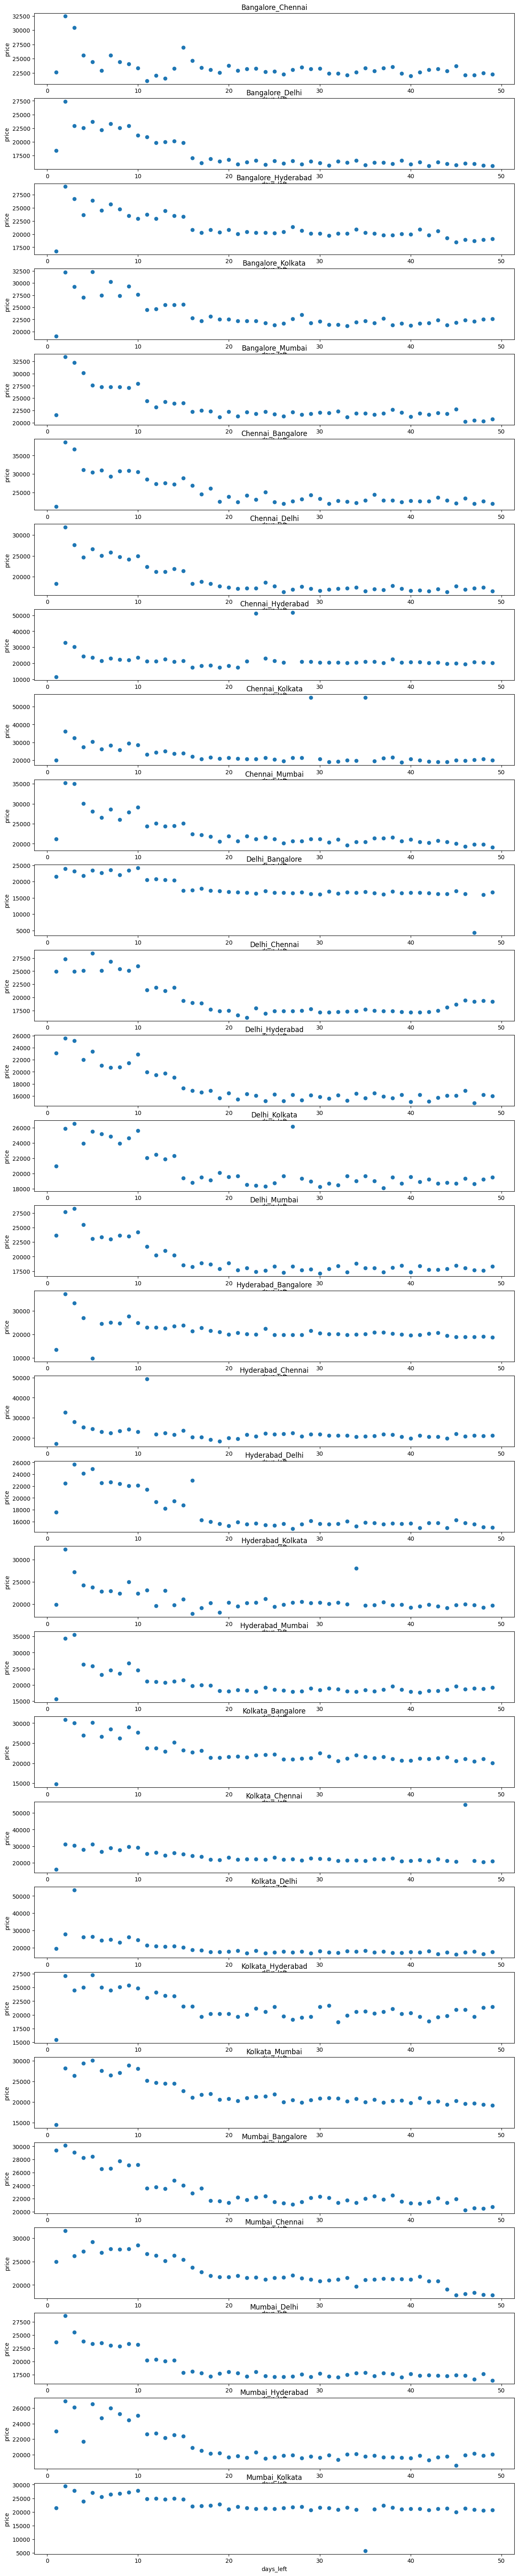

In [63]:
plt.figure(figsize=(15,80))
grp = data.groupby(['source_destination','days_left'])['price'].mean().reset_index()
for indx, val in enumerate(grp.source_destination.unique()):
    plt.subplot(30,1,indx+1)
    temp_df = grp.loc[grp['source_destination'] == val]
    plt.scatter(temp_df['days_left'], temp_df['price'])
    plt.title(val)
    plt.xlabel('days_left')
    plt.ylabel('price')

### Prices are low when a ticket is booked many days before the departure and price increases as the days left get reduced. Also there is a drop in prices one day before the departure.

In [64]:
print(data.source_destination.unique() , '\n' , data.source_destination.nunique())

['Delhi_Mumbai' 'Delhi_Bangalore' 'Delhi_Kolkata' 'Delhi_Hyderabad'
 'Delhi_Chennai' 'Mumbai_Delhi' 'Mumbai_Bangalore' 'Mumbai_Kolkata'
 'Mumbai_Hyderabad' 'Mumbai_Chennai' 'Bangalore_Delhi' 'Bangalore_Mumbai'
 'Bangalore_Kolkata' 'Bangalore_Hyderabad' 'Bangalore_Chennai'
 'Kolkata_Delhi' 'Kolkata_Mumbai' 'Kolkata_Bangalore' 'Kolkata_Hyderabad'
 'Kolkata_Chennai' 'Hyderabad_Delhi' 'Hyderabad_Mumbai'
 'Hyderabad_Bangalore' 'Hyderabad_Kolkata' 'Hyderabad_Chennai'
 'Chennai_Delhi' 'Chennai_Mumbai' 'Chennai_Bangalore' 'Chennai_Kolkata'
 'Chennai_Hyderabad'] 
 30


This code prints out the unique values in the 'source_destination' column of the 'data' dataframe, followed by the number of unique values.

The 'source_destination' column appears to be a combination of the 'source_city' and 'destination_city' columns, separated by an underscore. The first line of the code outputs the unique values in this column, while the second line outputs the number of unique values in the column.






In [65]:
# Delhi_Mumbai and Mumbai_Delhi , Mumbai_Hyderabad and Hyderabad_Mumbai become multiple routes, lets simplify it


data['source_destination']=np.where(data['source_destination']=='Delhi_Chennai', "Chennai_Delhi", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Delhi_Mumbai', "Mumbai_Delhi", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Delhi_Bangalore', "Bangalore_Delhi", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Delhi_Kolkata', "Kolkata_Delhi", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Delhi_Hyderabad', "Hyderabad_Delhi", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Mumbai_Bangalore', "Bangalore_Mumbai", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Mumbai_Kolkata', "Kolkata_Mumbai", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Mumbai_Hyderabad', "Hyderabad_Mumbai", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Mumbai_Chennai', "Chennai_Mumbai", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Bangalore_Kolkata', "Kolkata_Bangalore", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Bangalore_Hyderabad', "Hyderabad_Bangalore", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Bangalore_Chennai', "Chennai_Bangalore", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Kolkata_Hyderabad', "Hyderabad_Kolkata", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Kolkata_Chennai', "Chennai_Kolkata", data['source_destination'])
data['source_destination']=np.where(data['source_destination']=='Hyderabad_Chennai', "Chennai_Hyderabad", data['source_destination'])

data.head()

,airline,stops,class,duration,days_left,price,source_destination
0,SpiceJet,0,Economy,2.17,1,5953.0,Mumbai_Delhi
1,SpiceJet,0,Economy,2.33,1,5953.0,Mumbai_Delhi
2,AirAsia,0,Economy,2.17,1,5956.0,Mumbai_Delhi
3,Vistara,0,Economy,2.25,1,5955.0,Mumbai_Delhi
4,Vistara,0,Economy,2.33,1,5955.0,Mumbai_Delhi


This code is modifying the source_destination column in the data dataframe. It is replacing some of the city pairs in the source_destination column with their reverse order pairs. For example, it replaces Delhi_Chennai with Chennai_Delhi, Mumbai_Bangalore with Bangalore_Mumbai, and so on. This is done to ensure consistency in the source_destination column so that each city pair appears only once in the column, which will make it easier for analysis and visualization purposes.

In [66]:
print(data.source_destination.unique() , '\n' , data.source_destination.nunique())

['Mumbai_Delhi' 'Bangalore_Delhi' 'Kolkata_Delhi' 'Hyderabad_Delhi'
 'Chennai_Delhi' 'Bangalore_Mumbai' 'Kolkata_Mumbai' 'Hyderabad_Mumbai'
 'Chennai_Mumbai' 'Kolkata_Bangalore' 'Hyderabad_Bangalore'
 'Chennai_Bangalore' 'Hyderabad_Kolkata' 'Chennai_Kolkata'
 'Chennai_Hyderabad'] 
 15


This code prints out the unique values of the 'source_destination' column in the 'data' dataframe after some modifications, as well as the total number of unique values. The 'source_destination' column is a new column that was created by concatenating the 'source_city' and 'destination_city' columns. The modifications were made to standardize the values in this column by swapping the order of city names in some instances so that they all follow the same pattern. The code is useful for checking that the modifications were successful and that there are no duplicate or unexpected values in the column

In [67]:
# there is a range of 1-49 days left before trip date , which are discrete values.
# lets group the days into weeks.

data['weeks_before'] = data['days_left']
data['weeks_before'] = np.where(data['weeks_before']<=7 ,'week1',data['weeks_before'])
data['weeks_before'] = np.where((data['days_left']>7) & (data['days_left']<=14) ,'week2',data['weeks_before'])
data['weeks_before'] = np.where((data['days_left']>14) & (data['days_left']<=21) ,'week3',data['weeks_before'])
data['weeks_before'] = np.where((data['days_left']>21) & (data['days_left']<=28) ,'week4',data['weeks_before'])
data['weeks_before'] = np.where((data['days_left']>28) & (data['days_left']<=35) ,'week5',data['weeks_before'])
data['weeks_before'] = np.where((data['days_left']>35) & (data['days_left']<=42) ,'week6',data['weeks_before'])
data['weeks_before'] = np.where((data['days_left']>42) & (data['days_left']<=49) ,'week7',data['weeks_before'])

This code creates a new column in the data DataFrame called weeks_before which is derived from the days_left column. The weeks_before column categorizes the number of days left before departure into 7 different categories or "weeks" (week1 to week7). The np.where() function is used to assign the appropriate category based on the corresponding range of days left. For example, if the number of days left is less than or equal to 7, it will be categorized as "week1"; if the number of days left is greater than 7 and less than or equal to 14, it will be categorized as "week2", and so on.

In [68]:
#droping daysleft column

data.drop(['days_left'] , axis=1,inplace=True)

data.head()

,airline,stops,class,duration,price,source_destination,weeks_before
0,SpiceJet,0,Economy,2.17,5953.0,Mumbai_Delhi,week1
1,SpiceJet,0,Economy,2.33,5953.0,Mumbai_Delhi,week1
2,AirAsia,0,Economy,2.17,5956.0,Mumbai_Delhi,week1
3,Vistara,0,Economy,2.25,5955.0,Mumbai_Delhi,week1
4,Vistara,0,Economy,2.33,5955.0,Mumbai_Delhi,week1


This code snippet drops the column 'days_left' from the DataFrame 'data'. This is done because the information about days_left has been used to create a new column 'weeks_before', which categorizes the days_left into different weeks. The updated DataFrame with the 'days_left' column dropped is returned by the 'head()' method to display the first few rows of the updated DataFrame.






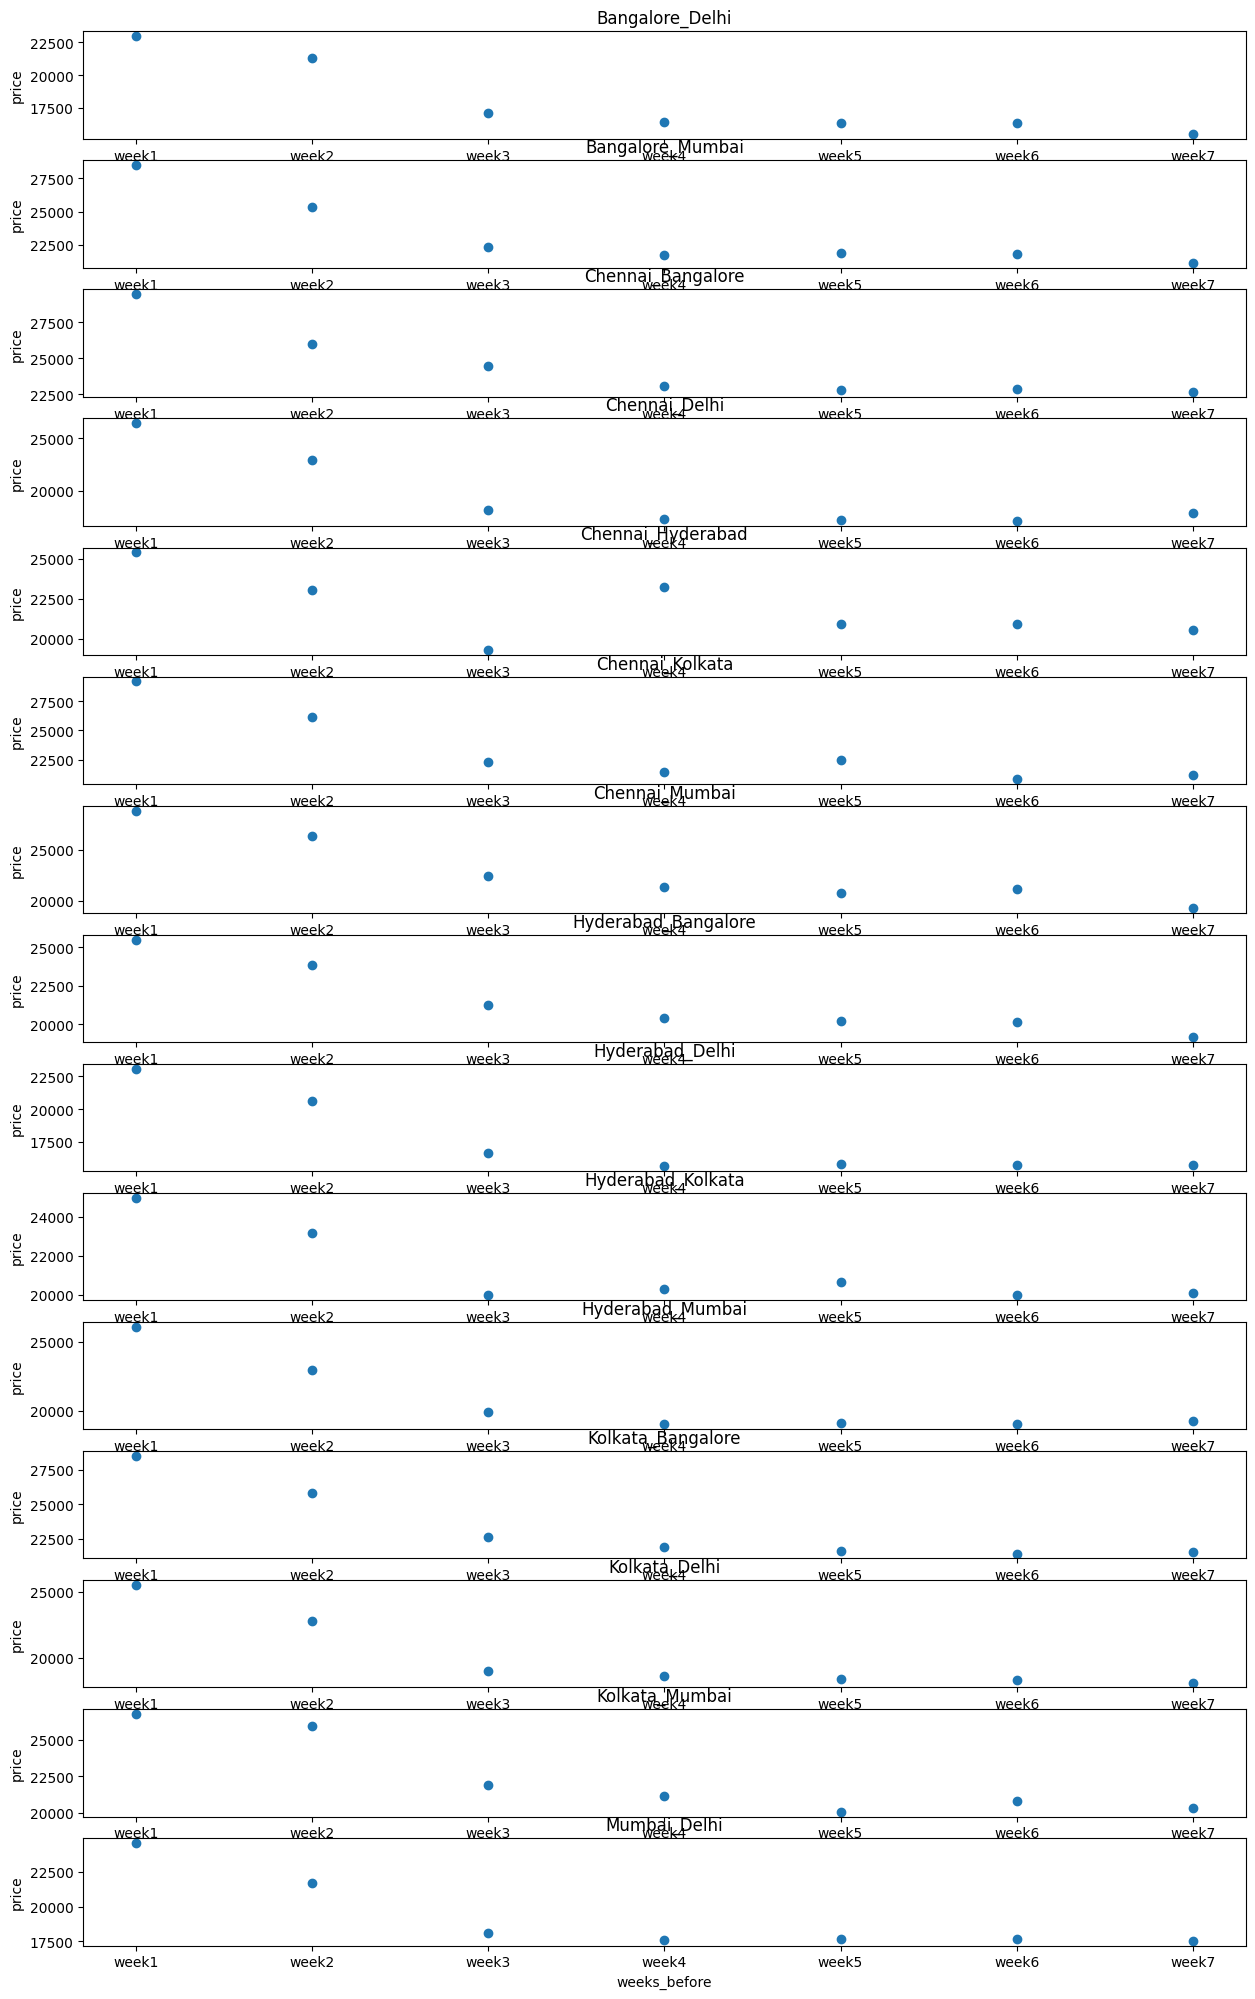

In [69]:
plt.figure(figsize=(15,50))
grp2 = data.groupby(['source_destination','weeks_before'])['price'].mean().reset_index()
for indx, val in enumerate(grp2.source_destination.unique()):
    plt.subplot(30,1,indx+1)
    temp_df = grp2.loc[grp2['source_destination'] == val]
    plt.scatter(temp_df['weeks_before'], temp_df['price'])
    plt.title(val)
    plt.xlabel('weeks_before')
    plt.ylabel('price')

This code creates a scatter plot for each unique value in the 'source_destination' column of the 'data' DataFrame, showing how the average price changes over different weeks before the travel date.

First, the 'data' DataFrame is grouped by the 'source_destination' and 'weeks_before' columns, and the mean price is calculated for each combination of the two. Then, for each unique value in the 'source_destination' column, a subplot is created in a 30-row, 1-column grid.

For each subplot, the 'temp_df' DataFrame is created by filtering the 'grp2' DataFrame to only include rows where the 'source_destination' column matches the current value being plotted. A scatter plot is then created with the 'weeks_before' column on the x-axis and the 'price' column on the y-axis, using the 'temp_df' DataFrame. The title of each subplot is set to the current 'source_destination' value, and the x- and y-axis labels are set to 'weeks_before' and 'price', respectively.

Overall, this code is useful for visualizing how the average flight prices change over time for different routes, and can help identify trends or patterns in the data.


### The Avg Price of the flights are quiet high in the last 2 weeks of booking trip.

In [70]:
data['class']= np.where(data['class']=='Economy',1,0)
data.head()

,airline,stops,class,duration,price,source_destination,weeks_before
0,SpiceJet,0,1,2.17,5953.0,Mumbai_Delhi,week1
1,SpiceJet,0,1,2.33,5953.0,Mumbai_Delhi,week1
2,AirAsia,0,1,2.17,5956.0,Mumbai_Delhi,week1
3,Vistara,0,1,2.25,5955.0,Mumbai_Delhi,week1
4,Vistara,0,1,2.33,5955.0,Mumbai_Delhi,week1


This code converts the values in the 'class' column of the 'data' DataFrame. If the value is 'Economy', it is replaced with 1, otherwise it is replaced with 0. This could be done to prepare the 'class' column for use in a model that requires numerical inputs rather than text inputs.






## Dummies Creation
Creating dummy variables is a common technique used in feature engineering for categorical variables. A dummy variable is a binary variable that indicates the presence or absence of a certain category in a categorical variable.

To create dummy variables, each unique category in a categorical variable is converted into a new binary variable with a value of 1 if the category is present in the observation and 0 otherwise. For example, suppose we have a categorical variable "color" with categories "red", "green", and "blue". To create dummy variables for this variable, we would create three new binary variables "red", "green", and "blue". If an observation has the category "red", the "red" variable would have a value of 1 and the "green" and "blue" variables would have a value of 0. If an observation has the category "green", the "green" variable would have a value of 1 and the "red" and "blue" variables would have a value of 0.

Creating dummy variables is important because many machine learning algorithms cannot handle categorical variables directly. By converting categorical variables into dummy variables, we can use them as input in machine learning algorithms. Additionally, creating dummy variables can help us capture the relationship between the categories and the target variable in a more meaningful way.



In [71]:
df = pd.get_dummies(data=data,drop_first=True)
df.head()

,stops,class,duration,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_destination_Bangalore_Mumbai,...,source_destination_Kolkata_Bangalore,source_destination_Kolkata_Delhi,source_destination_Kolkata_Mumbai,source_destination_Mumbai_Delhi,weeks_before_week2,weeks_before_week3,weeks_before_week4,weeks_before_week5,weeks_before_week6,weeks_before_week7
0,0,1,2.17,5953.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,1,2.33,5953.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,2.17,5956.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,2.25,5955.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,0,1,2.33,5955.0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


The code pd.get_dummies() is used to perform one-hot encoding on categorical features in the dataset.

Here, data is the original dataframe and drop_first=True means that the first category of each categorical feature is dropped to avoid multicollinearity.

The resulting dataframe df has new columns created for each unique category value in each categorical feature. For example, if the original dataframe had a categorical feature "color" with values "red", "green", and "blue", then get_dummies() would create three new columns "color_green", "color_blue", and "color_red". The value in each of these columns for a given row would be 1 if the original "color" value for that row was "green", "blue", or "red", respectively, and 0 otherwise.

So, df.head() shows the resulting dataframe with one-hot encoded features.


In [72]:
df.shape

(300153, 29)

df.shape returns a tuple containing the number of rows and columns of the dataframe df. The number of rows is the first element of the tuple, and the number of columns is the second element.






# Model Training
Model training is the process of using a labeled dataset and a machine learning algorithm to learn the patterns and relationships in the data and create a predictive model. This involves preparing and transforming the data, selecting an appropriate algorithm, training the model, evaluating its performance, fine-tuning the model parameters, and deploying the trained model. The goal of model training is to create a model that accurately predicts outcomes on new, unlabeled data and can be used to make decisions or solve problems in various fields such as finance, healthcare, and marketing. Python provides various libraries to train machine learning models, and the specific steps and implementation depend on the choice of algorithm and the task at hand

In [73]:
# Separating dependent and independent variables
x= df.drop(["price"], axis=1)
y = df["price"]

The code is creating two variables x and y for the machine learning model.

x contains all the features (independent variables) except for price.
y contains the target variable price which we want to predict.





In [74]:
# splitting the dataset
from sklearn.model_selection import train_test_split
x_train , x_test ,y_train,y_test = train_test_split(x,y, test_size=0.3 , random_state=56)

This code snippet is splitting the dataset into training and testing sets using the train_test_split function from the sklearn.model_selection module. It takes the predictor variables x and target variable y as inputs and returns four output variables: x_train, x_test, y_train, and y_test.

The parameter test_size is set to 0.3, which means that the dataset will be split into 70% training data and 30% testing data. The parameter random_state is set to 56, which is an arbitrary seed value used for reproducibility.






In [75]:
x_train.shape

(210107, 28)

x_train.shape returns the shape of the x_train numpy array, which represents the features used for training the machine learning model. It returns a tuple with two elements: the number of rows and the number of columns of the array, respectively. The shape of x_train tells us the number of training examples we have and the number of features in each example.






# Linear regression
Linear regression is a statistical method used to model the relationship between a dependent variable (usually denoted as y) and one or more independent variables (usually denoted as x). It assumes a linear relationship between the variables, meaning that the change in the dependent variable is proportional to the change in the independent variable(s). In a simple linear regression, there is only one independent variable, while in a multiple linear regression, there are multiple independent variables. The goal of linear regression is to find the best-fitting line or hyperplane that describes the relationship between the variables. This line or hyperplane can then be used to make predictions on new, unseen data. In Python, we can use the scikit-learn library to perform linear regression

In [76]:
# Scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fitting data
scaler.fit(x_train)

#transforming data onto x adn y train
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Scaling data is a process of transforming the features of a dataset to a similar scale or range. This process is important in machine learning because many algorithms assume that all features are on the same scale, and having features with different scales can cause problems such as biased results and poor model performance. Scaling data can also help reduce the computation time and improve the numerical stability of the algorithms.There are different scaling techniques available, such as standardization, min-max scaling, and robust scaling. Standardization, also known as Z-score normalization, scales the data to have a mean of 0 and a standard deviation of 1. Min-max scaling, on the other hand, scales the data to a range between 0 and 1. Robust scaling is a technique that scales the data based on the interquartile range, which makes it more robust to outliers.

In [77]:
x_train.shape, x_test.shape

((210107, 28), (90046, 28))

x_train.shape returns the number of rows and columns in the x_train dataframe. It tells us that how many training examples we have and how many features are there in each example.

Similarly, x_test.shape returns the number of rows and columns in the x_test dataframe. It tells us how many testing examples we have and how many features are there in each example.

Together, (x_train.shape, x_test.shape) tells us the number of training and testing examples, along with the number of features in each example for our machine learning model.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

x_train , x_test ,y_train,y_test = train_test_split(x,y, test_size=0.3 , random_state=56)

This code imports necessary libraries and splits the dataset into training and testing sets using train_test_split() function from sklearn.model_selection module. The test_size parameter specifies the proportion of the dataset to include in the test split, while the random_state parameter ensures that the same random split is obtained every time the code is run. The code also creates an instance of the LinearRegression class from sklearn.linear_model module.


In [79]:
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.9108172817697511

r2_score calculates the coefficient of determination, which is a statistical measure of how well the regression predictions approximate the real data points. It ranges from 0 to 1, with 1 indicating a perfect fit.

So, r2_score(y_test,y_pred) calculates the coefficient of determination between the predicted values (y_pred) and the actual values (y_test) for the test set.

It tells us how much of the variation in the dependent variable (i.e., price) can be explained by the independent variables (i.e., all the other features in the dataset). The closer the value to 1, the better the model fits the data.

In [80]:
## for making model more efficient
resduals = []
for i in range(0,101):
    x_train , x_test ,y_train,y_test = train_test_split(x,y, test_size=0.3 , random_state=i)
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    resduals.append(r2_score(y_test,y_pred))

This code snippet is performing the following steps:

It creates an empty list called resduals.
It loops through a range of values from 0 to 100, and for each iteration:
It splits the data into training and testing sets using train_test_split() with a test size of 0.3 and a different random state for each iteration.
It fits a linear regression model on the training data using lr.fit().
It predicts the target variable y for the test data using lr.predict().
It calculates the R-squared score between the predicted and actual values using r2_score() and appends it to the resduals list.
In summary, this code is performing a 101-fold cross-validation to evaluate the performance of a linear regression model on the dataset. The R-squared scores for each fold are stored in the resduals list.






In [81]:
# greatest r2 score 
np.argmax(resduals)

85

np.argmax(residuals) returns the index of the maximum value in the list residuals. In this case, residuals contains the R-squared values for 101 different random train-test splits of the dataset using linear regression. So, np.argmax(residuals) will return the index of the random state that resulted in the highest R-squared value.


In [82]:
x_train , x_test ,y_train,y_test = train_test_split(x,y, test_size=0.3 , random_state=85)


lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)
print( "Train score is :-", lr.score(x_train,y_train))
print( "Test score is :-", r2_score(y_test,y_pred_lr))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_lr))



Train score is :- 0.9105558756385401
Test score is :- 0.9129750406042052
MAE = 4369.123453429475


This code splits the data into training and test sets using the train_test_split function from scikit-learn. The split is done with a test size of 0.3 (30%) and a random state of 85. Then, a linear regression model is fit on the training set using the fit method of the LinearRegression class. After that, the model is used to predict the target variable for the test set using the predict method, and the R-squared score, mean absolute error (MAE), and training and test scores are printed to evaluate the performance of the model.






In [83]:
from sklearn.metrics import r2_score, mean_absolute_error ,mean_squared_error

lr_r2 = r2_score(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))


The code calculates the evaluation metrics such as R2 score, mean absolute error (MAE), and root mean squared error (RMSE) for the linear regression model. R2 score measures the proportion of variance in the dependent variable that is predictable from the independent variables. MAE measures the average absolute difference between the predicted and actual values. RMSE measures the standard deviation of the errors, which represents the distance, on average, between the predicted and actual values. These metrics are used to evaluate the performance of the model in making predictions on the test dataset.






## SGDRegressor

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd= SGDRegressor(max_iter= 10000, epsilon= 0.0002, loss="squared_loss")

#fiting the model
sgd.fit(x_train, y_train)

y_pred_sgd = sgd.predict(x_test)

print("Train score is :-",sgd.score(x_train , y_train) )
print("Train score is :-",sgd.score(x_test , y_test) )
print( "MAE =" ,mean_absolute_error(y_test, y_pred_sgd))

Train score is :- 0.9099093404548173
Train score is :- 0.9122814120379739
MAE = 4455.331931520306


The code above is fitting a SGDRegressor model to the training data and evaluating it on the test data. The max_iter parameter specifies the maximum number of iterations to be run, and epsilon is the stopping criterion (i.e., the algorithm stops when the difference between the current and previous cost function value is smaller than epsilon). The loss parameter specifies the loss function to be optimized.

After fitting the model, the code prints the training and test scores (i.e., the R-squared values), as well as the mean absolute error between the predicted and true values on the test set.

## Decision Tree
Decision tree is a popular machine learning algorithm used for both regression and classification tasks. It works by recursively partitioning the data into subsets based on the values of the independent variables, and then making a prediction based on the majority class or mean value of the target variable in each subset. The decision tree algorithm selects the best variable to split the data at each node based on a criterion such as Gini impurity or information gain. The resulting tree structure can be visualized and interpreted, and can also be used to make predictions on new data. Decision trees are easy to understand and implement, but can suffer from overfitting if not properly tuned. Ensemble methods such as Random Forest and Gradient Boosting can be used to improve the performance and reduce overfitting of decision trees.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt1 = DecisionTreeRegressor()

from sklearn.model_selection import GridSearchCV

GridSearchCV is a function in scikit-learn that performs hyperparameter tuning by exhaustively searching over specified parameter values for an estimator. It is used to tune hyperparameters by passing in a range of values for each parameter and then fitting the estimator on all possible combinations of parameter values using cross-validation. It returns the best parameter combination and the corresponding score. This can help improve the performance of machine learning models.


In [ ]:
parameters = {"max_depth" : (100,120,150,),
              "max_features" : ("auto","sqrt","log2"),
              "max_leaf_nodes" : (3,4,5),
              "min_samples_split" : (4,6,8,10),
              "min_samples_leaf" : (2,3,4,5,6)}

parameters is a dictionary that contains different hyperparameters and their corresponding values to be used in the GridSearchCV algorithm to fine-tune the DecisionTreeRegressor model. These hyperparameters include:

max_depth: The maximum depth of the decision tree.
max_features: The maximum number of features to consider when splitting a node.
max_leaf_nodes: The maximum number of leaf nodes in the decision tree.
min_samples_split: The minimum number of samples required to split an internal node.
min_samples_leaf: The minimum number of samples required to be at a leaf node.





In [ ]:
dt_grid = GridSearchCV(dt1 , param_grid=parameters,refit=True, n_jobs=-1,cv=10,verbose=2)
dt_grid

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': (100, 120, 150),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'max_leaf_nodes': (3, 4, 5),
                         'min_samples_leaf': (2, 3, 4, 5, 6),
                         'min_samples_split': (4, 6, 8, 10)},
             verbose=2)

It seems that there is an error in the last line of your code. dt_grid is not being assigned any value or operation. The variable dt_grid should be assigned the output of the GridSearchCV function call, which would be a fitted grid search object that can be used to access various attributes such as the best hyperparameters, best score, etc.



In [ ]:
# fitting the model
dt_grid.fit(x_train,y_train)

#predicting y
y_pred_dt = dt_grid.predict(x_test)


print(dt_grid.best_params_ )
print("Train Score is :-" , dt_grid.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_dt))

The code fits a decision tree regression model using GridSearchCV to perform a search over a specified parameter grid. The parameters searched over include max_depth, max_features, max_leaf_nodes, min_samples_split, and min_samples_leaf.

The GridSearchCV object is then fit to the training data using x_train and y_train. The best model is selected based on the parameter grid that gives the highest cross-validated score. The resulting dt_grid object contains information about the best parameters and the best model.

After fitting the dt_grid object, the model is used to predict y using x_test, and the R^2 score is calculated using r2_score(y_test, y_pred_dt).






In [ ]:
params = {"max_depth" : (100,90,80,),
              "max_features" : ("auto","sqrt"),
              "max_leaf_nodes" : (2,5,7),
              "min_samples_split" : (4,5,3),
              "min_samples_leaf" : (2,3)}

dt_grid2 = GridSearchCV(dt1 , param_grid=params,refit=True, n_jobs=-1,cv=10,verbose=2)

# fitting the model
dt_grid2.fit(x_train,y_train)

#predicting y
y_pred_dt2 = dt_grid2.predict(x_test)


print(dt_grid2.best_params_ )
print("Train Score is :-" , dt_grid2.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_dt2))

Based on the code you provided, it seems that you are performing hyperparameter tuning using GridSearchCV on a decision tree regression model. You first defined a dictionary of parameters to search over, and then used GridSearchCV to fit the model using the training data and find the best combination of hyperparameters based on the specified scoring metric (which appears to be R-squared in this case).

After fitting the tuned model, you used it to predict the target variable for the test data and evaluated its performance using the R-squared metric. You repeated the process with a slightly different set of parameters.

It's worth noting that hyperparameter tuning is an important step in machine learning model building, as it helps to optimize the model's performance on unseen data. However, it's also important to keep in mind that the best hyperparameters found during tuning may not always generalize well to new data. Therefore, it's a good practice to evaluate the model's performance on a separate validation set or using cross-validation.






In [ ]:
dt2 =DecisionTreeRegressor(max_depth= 100,
                           max_features= 'auto',
                           max_leaf_nodes= 7,
                           min_samples_leaf= 2,
                           min_samples_split= 4,
                           random_state= 10)


# fitting the model
dt2.fit(x_train,y_train)

#predicting y
y_pred_dt = dt2.predict(x_test)

print("Train Score is :-" , dt2.score(x_train,y_train) )
print("Test Score is :-" , dt2.score(x_test,y_test))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_dt))


Train Score is :- 0.9305628302987194
Test Score is :- 0.9334226661176279
MAE = 3766.260999262443


The code above trains and tests a decision tree regression model with specific hyperparameters. The DecisionTreeRegressor class from sklearn.tree is imported and initialized with specific hyperparameters. The model is then fitted to the training data with dt2.fit(x_train, y_train). Finally, the model's training and test scores are printed using dt2.score(x_train, y_train) and dt2.score(x_test, y_test), respectively. Additionally, the mean absolute error between the predicted and actual test labels is computed using mean_absolute_error(y_test, y_pred_dt) and printed as well.






In [ ]:
dt_r2 = r2_score(y_test, y_pred_dt)
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))

dt_r2, dt_mae, and dt_rmse are variables that hold the evaluation metrics of the Decision Tree Regressor model.

dt_r2: represents the R-squared (coefficient of determination) regression score function. It measures the proportion of the variance in the dependent variable that is predictable from the independent variables. A value of 1 indicates a perfect fit, while a value of 0 indicates that the model doesn't explain the variance in the dependent variable.

dt_mae: represents the mean absolute error. It measures the absolute difference between the predicted values and the true values. It gives an idea of how close the predictions are to the actual values.

dt_rmse: represents the root mean squared error. It is the square root of the mean squared error. It measures the difference between the predicted values and the true values in the same units as the dependent variable. It gives an idea of how far the predictions are from the actual values.

## Random Forest
Random forest is a popular machine learning algorithm that is used for both classification and regression tasks. It is an ensemble method that combines multiple decision trees and uses the concept of bagging to improve the accuracy and reduce overfitting. In a random forest, each decision tree is trained on a random subset of the data and a random subset of the features, and the final prediction is made by averaging the predictions of all the trees. The randomness in the selection of data and features helps to create a diverse set of trees that are less likely to overfit to the training data. Random forests are easy to use and interpret, and they can handle large datasets with high dimensionality. They also provide feature importance scores that can be used to identify the most important features in the dataset. However, they can be computationally expensive and may require tuning of hyperparameters such as the number of trees and maximum depth of the trees to achieve optimal performance.

In [84]:
from sklearn.ensemble import RandomForestRegressor

regf = RandomForestRegressor()
  
regf_params = {"n_estimators":(10,20,30),
                'max_depth':(2,3,5),
                'min_samples_split':[3,5,7],
                'min_samples_leaf':[2,4],
                'max_features':['auto','sqrt']}


This code is setting up hyperparameters for a RandomForestRegressor model. It specifies different values for the number of trees in the forest (n_estimators), maximum depth of each tree (max_depth), minimum number of samples required to split an internal node (min_samples_split), minimum number of samples required to be at a leaf node (min_samples_leaf), and the number of features to consider when looking for the best split (max_features). These hyperparameters will later be used in a grid search to find the best combination of values for the model.






In [85]:
# Setting the max_dept to 3 for the purpose of ease of explainbility and readability
tree_model = RandomForestRegressor(max_depth=3, random_state=0, n_estimators=10)
tree_model.fit(x_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=10, random_state=0)

This code creates a RandomForestRegressor object called tree_model with max_depth=3, random_state=0 (for reproducibility), and n_estimators=10. Then it fits the model on the training data using the fit method, with x_train as the input features and y_train as the target variable.






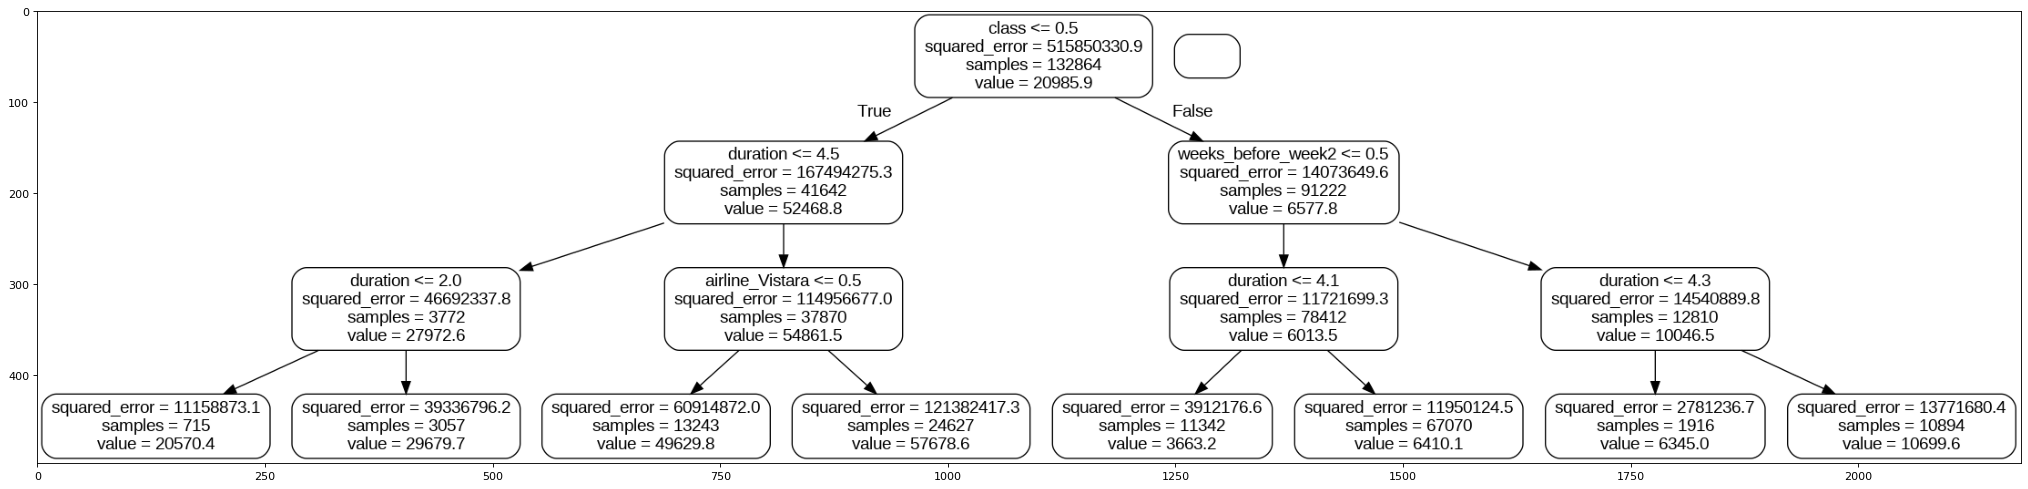

In [86]:
import pydot
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
from sklearn.tree import export_graphviz
# Visualization of Nodes for the purpose of explainability
figure(figsize=(32, 24), dpi=80)
tree = tree_model.estimators_[0]
export_graphviz(
    tree,
    out_file="tree.dot",
    feature_names=list(x_train.columns),
    rounded=True,
    precision=1,
)
(graph,) = pydot.graph_from_dot_file("tree.dot")
graph.write_png("tree.png")
img = mpimg.imread("tree.png")
imgplot = plt.imshow(img)
plt.show()

This is visualizing the decision tree model by creating a graph using Graphviz and displaying the resulting image using Matplotlib. The code creates a tree model with a maximum depth of 3 and 10 estimators, and exports the first estimator as a dot file using export_graphviz() from sklearn.tree. Then, the dot file is converted to a PNG image using pydot and displayed using matplotlib.pyplot.

In [ ]:
rf_GS = GridSearchCV(estimator=regf ,param_grid=regf_params,n_jobs=-1,cv=5,verbose=2)
rf_GS

rf_GS is an instance of the GridSearchCV class from scikit-learn, which is used to perform a grid search over a specified parameter grid to find the best hyperparameters for a given estimator. In this case, the estimator is a random forest regressor (regf), and the parameter grid consists of different combinations of hyperparameters to be searched over. The n_jobs parameter specifies the number of CPU cores to use for parallel computation, and cv specifies the number of cross-validation folds to use for evaluating the performance of each hyperparameter combination. The verbose parameter controls the level of detail of the output during fitting.


In [ ]:
# fitting the model
rf_GS.fit(x_train,y_train)

Great! The GridSearchCV function is now fitting the model with the specified hyperparameters. This may take some time depending on the size of your dataset and the complexity of your model. Once it is done, you can retrieve the best hyperparameters by accessing the best_params_ attribute of the GridSearchCV object.


In [ ]:
#predicting y
y_pred_rf = rf_GS.predict(x_test)


print(rf_GS.best_params_ )
print("Train Score is :-" , rf_GS.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_rf))

This code is performing a grid search using cross-validation to find the best hyperparameters for a RandomForestRegressor model.

The GridSearchCV function from Scikit-learn is used to perform the grid search. The estimator parameter is set to regf, which is an instance of the RandomForestRegressor class. The param_grid parameter is set to regf_params, which is a dictionary of hyperparameters and their values that we want to search over.

The n_jobs parameter is set to -1 to use all available CPU cores, and cv is set to 5 to use 5-fold cross-validation. verbose is set to 2 to print progress messages during the grid search.

After fitting the grid search object to the training data using the fit method, the best hyperparameters are printed using the best_params_ attribute. The training and test scores are also printed using the score method and the r2_score function, respectively. Finally, the predicted values for the test data are stored in y_pred_rf.

In [ ]:
# Tuning
regf_params2 = {"n_estimators":(10,12,8),
                'max_depth':(4,5,6),
                'min_samples_split':[4,5,6],
                'min_samples_leaf':[3,4,5],
                'max_features':['auto','sqrt']}

rf_GS2 = GridSearchCV(estimator=regf ,param_grid=regf_params2,n_jobs=-1,cv=5,verbose=2)
rf_GS2

# fitting the model
rf_GS2.fit(x_train,y_train)

#predicting y
y_pred_rf2 = rf_GS2.predict(x_test)


print(rf_GS2.best_params_ )
print("Train Score is :-" , rf_GS2.score(x_train,y_train) )
print("Test Score is :-" , rf_GS2.score(x_test,y_test))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_rf2))

regf_params2 is a new dictionary that specifies different hyperparameters for the Random Forest Regressor model than the previous one. rf_GS2 is a new instance of GridSearchCV that takes in the updated hyperparameters dictionary, with the same estimator, number of jobs, cross-validation, and verbosity.

After fitting the model and making predictions, the best hyperparameters, training score, and test score are printed, as well as the Mean Absolute Error (MAE).

In [ ]:
rf = RandomForestRegressor(max_depth= 6,
                             max_features= 'auto',
                             min_samples_leaf= 4,
                             min_samples_split= 6,
                             n_estimators= 12)

# fitting the model
rf.fit(x_train,y_train)

#predicting y
y_pred_rf = rf.predict(x_test)

print("Train Score is :-" , rf.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_rf))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_rf))

Train Score is :- 0.941074695866789
Test Score is :- 0.9435776376368178
MAE = 3293.977521420759


The rf variable contains the trained RandomForestRegressor model with the hyperparameters you specified. You have also used this model to make predictions on the test set and calculated the R-squared score and MAE. The results of the model performance on the test set are printed out.






In [ ]:
rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# ADABoost
ADABoost, or Adaptive Boosting, is a popular ensemble learning algorithm used in machine learning for classification and regression problems. It works by combining multiple weak learners, typically decision trees with a single level of depth, to create a strong learner that can make accurate predictions. The algorithm assigns weights to each instance in the training set, and then trains a weak learner on the weighted data. The algorithm then updates the weights based on the errors made by the weak learner and trains another weak learner on the updated weights. This process is repeated until a specified number of weak learners have been trained or the accuracy on the training set reaches a certain threshold. The final prediction is made by combining the predictions of all the weak learners, weighted by their accuracy.



In [ ]:
from sklearn.ensemble import AdaBoostRegressor

AdaBoostRegressor is a machine learning algorithm used for regression tasks. It is an ensemble learning method that combines multiple weak learners to create a strong learner. AdaBoostRegressor works by creating a series of weak models, where each model is fit to the training data and then evaluated. The algorithm then assigns higher weights to data points that were incorrectly predicted by the previous model and lower weights to data points that were correctly predicted. This process is repeated until a final model is created, which is a weighted combination of all the weak models. The resulting model is expected to have better predictive performance than any of the individual weak models.






In [ ]:
ada_boost = AdaBoostRegressor(learning_rate=0.15,random_state =85, n_estimators=100)
# fitting data
ada_boost.fit(x_train,y_train)

#Predicting value
y_pred_ada = ada_boost.predict(x_test)

AdaBoostRegressor is an ensemble learning method for regression. It fits a series of weak learners on modified versions of the data. The weak learners are typically shallow decision trees, although other models can be used as well. The final prediction is a weighted sum of the predictions of the individual models.

In the code you provided, an instance of AdaBoostRegressor is created with a learning rate of 0.15, a random state of 85, and 100 estimators (i.e., the number of weak learners in the ensemble). The model is then fit to the training data, and used to predict the target variable on the test data.

In [ ]:
# predicting accuracy
print("Train Score is :-" , ada_boost.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_ada))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_ada))

Train Score is :- 0.9284569313506805
Test Score is :- 0.9309800779517223
MAE = 3876.6067858377733


These print statements are evaluating the performance of the AdaBoostRegressor model on the training and test sets, and printing the mean absolute error between the predicted and actual values of the target variable on the test set.

ada_boost.score(x_train,y_train): This computes the coefficient of determination (R-squared) of the training set predictions of the model. The score ranges from 0 to 1, with higher values indicating a better fit to the training data.
r2_score(y_test,y_pred_ada): This computes the R-squared value of the test set predictions of the model. The score ranges from -inf to 1, with higher values indicating a better fit to the test data.
mean_absolute_error(y_test, y_pred_ada): This computes the mean absolute error between the predicted and actual values of the target variable on the test set. The lower the value, the better the performance of the model.





In [ ]:
ada_r2 = r2_score(y_test, y_pred_ada)
ada_mae = mean_absolute_error(y_test, y_pred_ada)
ada_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ada))

These lines of code are calculating three different evaluation metrics for a machine learning model's predictions.

ada_r2 is calculating the R-squared coefficient of determination score, which measures the proportion of the variance in the dependent variable that is explained by the independent variable(s) in a regression model. This score ranges from 0 to 1, with higher values indicating a better fit.

ada_mae is calculating the mean absolute error (MAE), which measures the average absolute difference between the predicted and actual values. MAE is a measure of the model's accuracy, with lower values indicating better performance.

ada_rmse is calculating the root mean squared error (RMSE), which measures the average squared difference between the predicted and actual values, taking the square root of the result. RMSE is a measure of the model's precision, with lower values indicating better performance.

All three metrics are commonly used to evaluate regression models and provide different insights into the model's performance.

##  XGBoost

In [ ]:
import xgboost as xgb

regressor=xgb.XGBRegressor(eval_metric='rmsle')

from sklearn.model_selection import GridSearchCV
# set up our search grid

This code sets up a GridSearchCV object to search for the best hyperparameters of an XGBoost regressor model.

The XGBoost regressor is imported from the xgboost library, and an instance of the regressor is created with the eval_metric parameter set to 'rmsle', which specifies that the root mean squared logarithmic error should be used as the evaluation metric during training.

The GridSearchCV class from the sklearn.model_selection module is imported, which is used to perform an exhaustive search over a specified parameter grid. This allows us to find the best combination of hyperparameters for our model.

The parameter grid is not shown in this code snippet, but it would be defined as a dictionary of parameter names and their possible values

In [ ]:
param_grid = {"max_depth":    [4, 5],
              "n_estimators": [500, 600, 700],
              "learning_rate": [0.01, 0.015]}

# try out every combination of the above values
search = GridSearchCV(regressor, param_grid, cv=5).fit(x_train, y_train)

print("The best hyperparameters are ",search.best_params_)

This code defines a parameter grid for the XGBoost regressor model and uses GridSearchCV to find the best hyperparameters for the model.

The param_grid variable is a dictionary that contains the hyperparameters we want to tune, along with the possible values we want to try for each hyperparameter. In this case, we are tuning the max_depth, n_estimators, and learning_rate hyperparameters, with the max_depth hyperparameter having values of 4 and 5, the n_estimators hyperparameter having values of 500, 600, and 700, and the learning_rate hyperparameter having values of 0.01 and 0.015.

The GridSearchCV function is used to perform an exhaustive search over all possible combinations of hyperparameters, using 5-fold cross-validation to evaluate the performance of each model. The fit() method is then called to train the model and find the best hyperparameters.

Finally, the best hyperparameters found by GridSearchCV are printed using the best_params_ attribute of the search object.

Note that cv=5 specifies that 5-fold cross-validation should be used, meaning the data will be split into 5 equal parts, with 4 parts used for training and 1 part used for testing in each iteration of the cross-validation process.

In [ ]:
regressor=xgb.XGBRegressor(learning_rate = 0.015,
                           n_estimators  = 700,
                           max_depth     = 5,
                           eval_metric='rmse')

regressor.fit(x_train, y_train) 

# Predict the model
y_pred_xg = regressor.predict(x_test)

# RMSE Computation
print("Train Score is :-" ,  regressor.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_xg))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_xg))

Train Score is :- 0.9572155945652867
Test Score is :- 0.9592765475312179
MAE = 2616.6271548488826


This code trains an XGBoost regressor model using the best hyperparameters found by the previous GridSearchCV code block and calculates several evaluation metrics for the model's predictions.

The XGBRegressor class from the xgboost library is used to create an instance of the regressor model with the hyperparameters set to the best values found by GridSearchCV.

The fit() method is called to train the model on the training data (x_train and y_train), and the predict() method is used to make predictions on the test data (x_test). The predicted values are stored in the y_pred_xg variable.

The code then calculates the R-squared coefficient of determination score using r2_score() from sklearn.metrics, which measures the proportion of the variance in the dependent variable that is explained by the independent variable(s) in a regression model. It also calculates the mean absolute error (MAE) using mean_absolute_error() from sklearn.metrics, which measures the average absolute difference between the predicted and actual values.

Finally, the code prints the training score, test score, and MAE for the model's predictions. Note that the score() method is used to calculate the R-squared score on the training data.








In [ ]:
xg_r2 = r2_score(y_test, y_pred_xg)
xg_mae = mean_absolute_error(y_test, y_pred_xg)
xg_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xg))

This code calculates the R-squared coefficient of determination score, mean absolute error (MAE), and root mean squared error (RMSE) for the predictions made by the XGBoost regressor model.

The r2_score(), mean_absolute_error(), and np.sqrt(mean_squared_error()) functions from sklearn.metrics are used to calculate these metrics, using the test set (y_test and y_pred_xg) as input.

The R-squared score measures how well the model's predictions fit the actual values, with higher scores indicating better fit. The MAE measures the average absolute difference between the predicted and actual values, with lower values indicating better accuracy. The RMSE measures the standard deviation of the errors made by the model, with lower values indicating better accuracy.






In [ ]:
print('Linear regression scores')
print( "LR Train score is :-", lr.score(x_train,y_train))
print( "LR Test score is :-", r2_score(y_test,y_pred))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_lr))
print('\n')

#SGDRegresor
print('SGD Regressor scores')
print("Sgd Train score is :-",sgd.score(x_train , y_train) )
print("Sgd Train score is :-",sgd.score(x_test , y_test) )
print( "MAE =" ,mean_absolute_error(y_test, y_pred_sgd))
print('\n')

#Decision tree
print('DT scores')
print("Train Score is :-" , dt2.score(x_train,y_train) )
print("Test Score is :-" , dt2.score(x_test,y_test))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_dt))
print('\n')

#Random Forest
print("Train Score is :-" , rf.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_rf))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_rf))
print('\n')

#adaboost
print('ADA scores')
print("Ada Train Score is :-" , ada_boost.score(x_train,y_train) )
print("Ada Test Score is :-" , r2_score(y_test,y_pred_ada))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_ada))
print('\n')

#XgBoost
print('XgBoost scores')
print("XgBoost Train Score is :-" ,  regressor.score(x_train,y_train))
print("XgBoost Test Score is :-" , r2_score(y_test, y_pred_xg))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_xg))

Linear regression scores
LR Train score is :- 0.91055587563854
LR Test score is :- -0.9218011682442098
MAE = 4369.123453429479


SGD Regressor scores
Sgd Train score is :- 0.9099093404548173
Sgd Train score is :- 0.9122814120379739
MAE = 4455.331931520306


DT scores
Train Score is :- 0.9305628302987194
Test Score is :- 0.9334226661176279
MAE = 3766.260999262443


Train Score is :- 0.941074695866789
Test Score is :- 0.9435776376368178
MAE = 3293.977521420759


ADA scores
Ada Train Score is :- 0.9284569313506805
Ada Test Score is :- 0.9309800779517223
MAE = 3876.6067858377733


XgBoost scores
XgBoost Train Score is :- 0.9572155945652867
XgBoost Test Score is :- 0.9592765475312179
MAE = 2616.6271548488826


This code prints out the train score, test score, and mean absolute error (MAE) for each of the six regression models that were previously fitted and tested on the test set (x_test and y_test).

For each model, the score() method from its respective model object is used to calculate the R-squared score for the training set (x_train and y_train). The r2_score() function from sklearn.metrics is used to calculate the R-squared score for the test set (y_test and the predictions made by the model).

The mean_absolute_error() function from sklearn.metrics is used to calculate the MAE for the test set (y_test and the predictions made by the model).

The code outputs the results in a readable format, with each model's scores printed under its respective model name.

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear_regression', 'Decision Tree', 'Random Forest', 
              'AdaBoost', 'XgBoost'],
    
    'r2_Score': [lr_r2,dt_r2,rf_r2,ada_r2,xg_r2],
    
    'MAE' : [lr_mae,dt_mae,rf_mae,ada_mae,xg_mae],
    
    'RMSE' : [lr_rmse,dt_rmse,rf_rmse,ada_rmse,xg_rmse]
    
                      })
models.sort_values(by='r2_Score', ascending=False)

,Model,r2_Score,MAE,RMSE
4,XgBoost,0.959277,2616.627155,4552.566401
2,Random Forest,0.943578,3293.977521,5358.702253
1,Decision Tree,0.933423,3766.260999,5820.994566
3,AdaBoost,0.930980,3876.606786,5926.813020
0,Linear_regression,0.912975,4369.123453,6655.120275


This code creates a pandas DataFrame called models that stores the R-squared scores, MAE, and RMSE for each of the five regression models that were previously fitted and tested on the test set.

The sort_values() method is used to sort the DataFrame by the R-squared scores in descending order, which allows us to easily see which model has the highest R-squared score.

The output of this code is a table that displays the five regression models along with their respective R-squared scores, MAE, and RMSE, sorted by R-squared score in descending order.

## Conclusion

The XGBRegressor model performed the best with an R^2 score of 0.9592 and MAE score of 2616.6 on the test dataset.
Business tickets are generally 5 times more expensive than economy tickets.
Vistara and AirIndia are the most expensive airlines, while AirAsia is the cheapest. For business tickets, only Vistara and AirIndia are available, with Vistara being slightly more expensive.
Prices for tickets generally rise slowly until 20 days before the flight, after which they rise drastically. However, it is possible to find cheaper tickets one day before the flight due to unsold seats.
Prices for tickets generally increase with longer flight times until around 20 hours, after which they start to decrease.
For the time of the flight, afternoon and late night departures tend to be cheaper, while night departures are more expensive. Similarly, early morning, afternoon, and late night arrivals tend to be cheaper, while evening arrivals are more expensive.
Flights from Delhi are generally the cheapest, while flights to Kolkata are the most expensive. For other cities, the prices are relatively equal, with Chennai being slightly more expensive on average.

#LICENSE

MIT License

Copyright (c) 2023 Viral Jangale

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

